<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

In [261]:
!pip install tensorflow==2.15.0 scikit-learn==1.2.2 matplotlib===3.7.1 seaborn==0.13.1 numpy==1.24.4 pandas==1.5.3 -q --user

## Importing necessary libraries

In [2]:
# Library for data manipulation and analysis.
import pandas as pd
# Fundamental package for scientific computing.
import numpy as np
#splitting datasets into training and testing sets.
from sklearn.model_selection import train_test_split
#Imports tools for data preprocessing including label encoding, one-hot encoding, and standard scaling
from sklearn.preprocessing import LabelEncoder, OneHotEncoder,StandardScaler
#Imports a class for imputing missing values in datasets.
from sklearn.impute import SimpleImputer
#Imports the Matplotlib library for creating visualizations.
import matplotlib.pyplot as plt
# Imports the Seaborn library for statistical data visualization.
import seaborn as sns
# Time related functions.
import time
#Imports functions for evaluating the performance of machine learning models
from sklearn.metrics import confusion_matrix, f1_score,accuracy_score, recall_score, precision_score, classification_report


#Imports the tensorflow,keras and layers.
import tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, Input, Dropout,BatchNormalization
from tensorflow.keras import backend

# to suppress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

2024-08-17 12:45:20.952250: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
# Set the seed using keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed
tf.keras.utils.set_random_seed(812)

# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it will affect the overall performance, so be mindful of that.
tf.config.experimental.enable_op_determinism()

## Loading the dataset

In [6]:
bank_data = pd.read_csv('Churn.csv')

## Data Overview

In [3]:
bank_data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [6]:
bank_data.shape

(10000, 14)

In [10]:
bank_data['RowNumber'].nunique()

10000

In [11]:
bank_data['CustomerId'].nunique()

10000

In [207]:
bank_data['Surname'].nunique()

2932

In [17]:
bank_data['Geography'].nunique()

3

* RowNumber and CustomerId columns have unique values for each row in the dataset. So they can be removed.
* Expected Surname to be more unique. But there are only 2932 unique surnames of 10000 rows. But still this is high cardinality to consider it as a categorical variable. Also surname having to play a role in whether a customer will drop out or not seems to be unlikely correlation. So deciding to drop it out.
* Geography has only 3 unique values. It is a categorical variable.

In [7]:
bank_data = bank_data.drop(['RowNumber', 'CustomerId','Surname'], axis=1)

In [209]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
bank_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0,650.528800,96.653299,350.00,584.00,652.000,718.0000,850.00
Age,10000.0,38.921800,10.487806,18.00,32.00,37.000,44.0000,92.00
Tenure,10000.0,5.012800,2.892174,0.00,3.00,5.000,7.0000,10.00
Balance,10000.0,76485.889288,62397.405202,0.00,0.00,97198.540,127644.2400,250898.09
NumOfProducts,10000.0,1.530200,0.581654,1.00,1.00,1.000,2.0000,4.00
HasCrCard,10000.0,0.705500,0.455840,0.00,0.00,1.000,1.0000,1.00
IsActiveMember,10000.0,0.515100,0.499797,0.00,0.00,1.000,1.0000,1.00
EstimatedSalary,10000.0,100090.239881,57510.492818,11.58,51002.11,100193.915,149388.2475,199992.48
Exited,10000.0,0.203700,0.402769,0.00,0.00,0.000,0.0000,1.00


In [211]:
bank_data.duplicated().sum()

0

* No duplicated rows

In [212]:
bank_data.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

* No missing values. So we will not need to do missing value imputation in pre-processing.

In [213]:
bank_data['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [214]:
bank_data['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

* Doing a check on the gender column. Ratio of Male to Female seems quite similar. Not an imbalanced dataset in this regard.

In [215]:
round(bank_data["Exited"].value_counts(1) * 100, 2)

0   79.6300
1   20.3700
Name: Exited, dtype: float64

* About 80% are exited customers
* 20% are existing customers
* This is a slightly imbalanced dataset. So we might want to use class weights parameter in the models as well as stratify when splitting the dataset. 

## Exploratory Data Analysis

*** Re-using some function definitions from study material to do EDA ****

In [69]:
# Function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [33]:
# Function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [119]:
### Function to plot distributions


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(4, 1, figsize=(10, 10))

    target_uniq = data[target].unique()

    axs[0].set_title("Distribution of target wrt predictor")
    sns.histplot(
        data=data,
        x=predictor,
        hue=target,
        kde=True,
        palette="bright",
        ax=axs[0],
    )

    axs[1].set_title("Distribution of target wrt predictor for target=" + str(target_uniq[0]))
    sns.violinplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        ax=axs[1],
    )

    axs[2].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, hue=target, y=predictor, ax=axs[2])

    axs[3].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        hue=target,
        y=predictor,
        ax=axs[3],
        showfliers=False,
    )

    plt.tight_layout()
    plt.show()

In [55]:
# function to plot stacked bar chart


def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

### Univariate Analysis

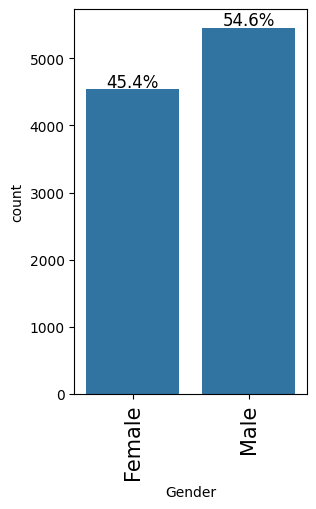

In [70]:
labeled_barplot(bank_data, "Gender",perc=True)

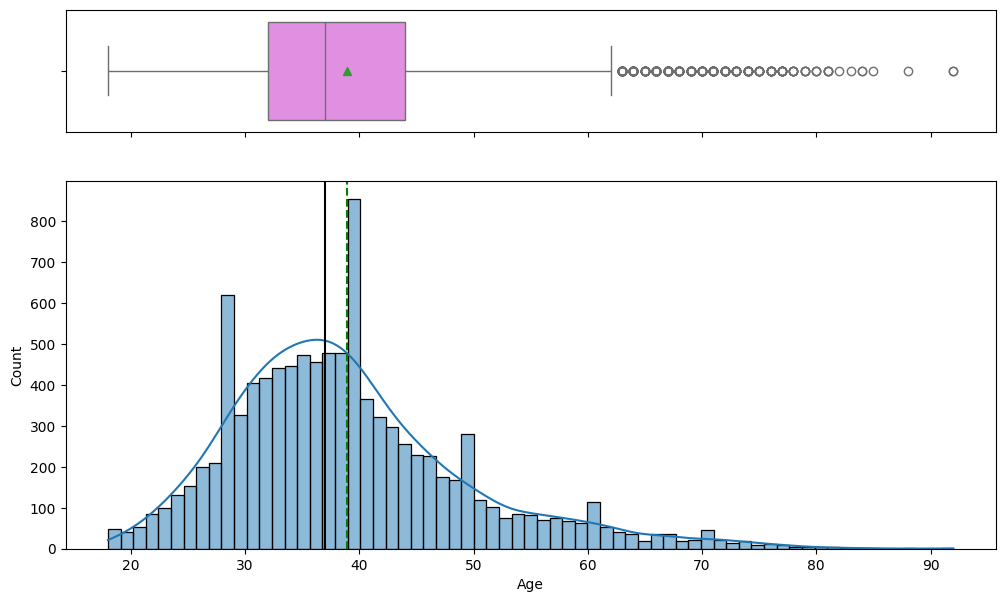

In [73]:
histogram_boxplot(bank_data, 'Age',kde=True)

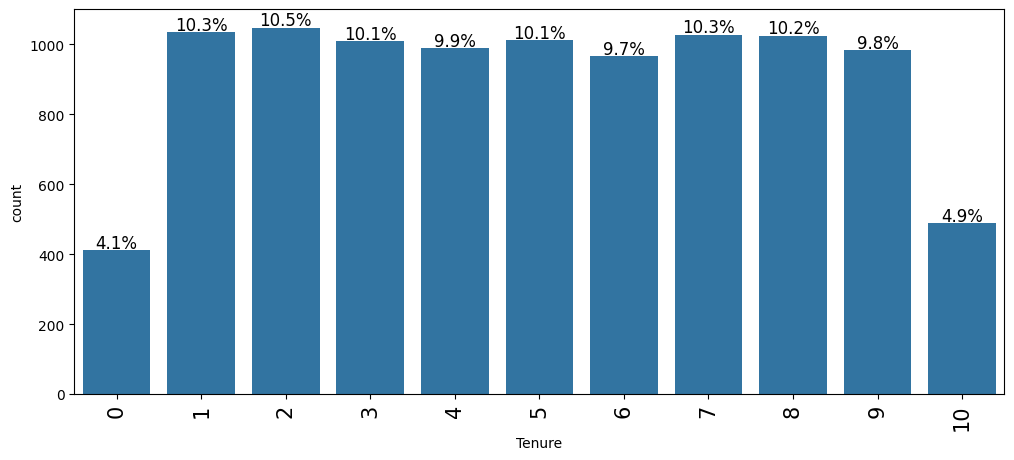

In [75]:
labeled_barplot(bank_data, 'Tenure',perc=True)

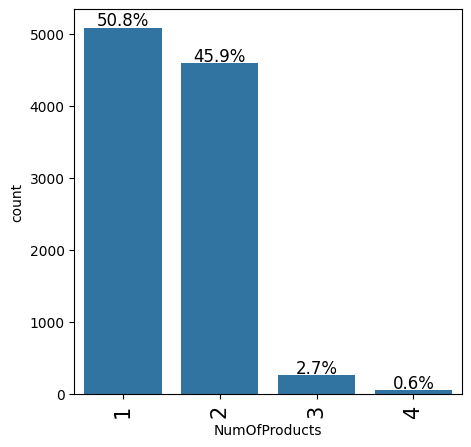

In [76]:
labeled_barplot(bank_data, 'NumOfProducts',perc=True)

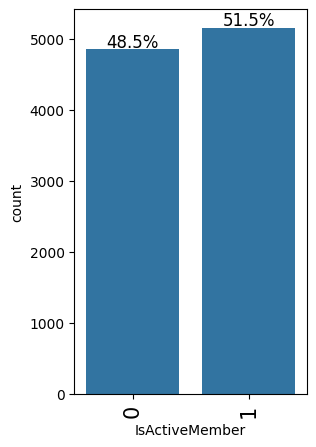

In [80]:
labeled_barplot(bank_data, 'IsActiveMember',perc=True)

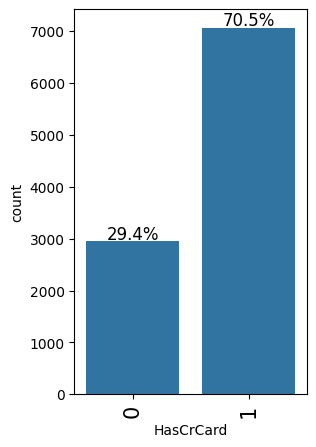

In [81]:
labeled_barplot(bank_data, 'HasCrCard',perc=True)

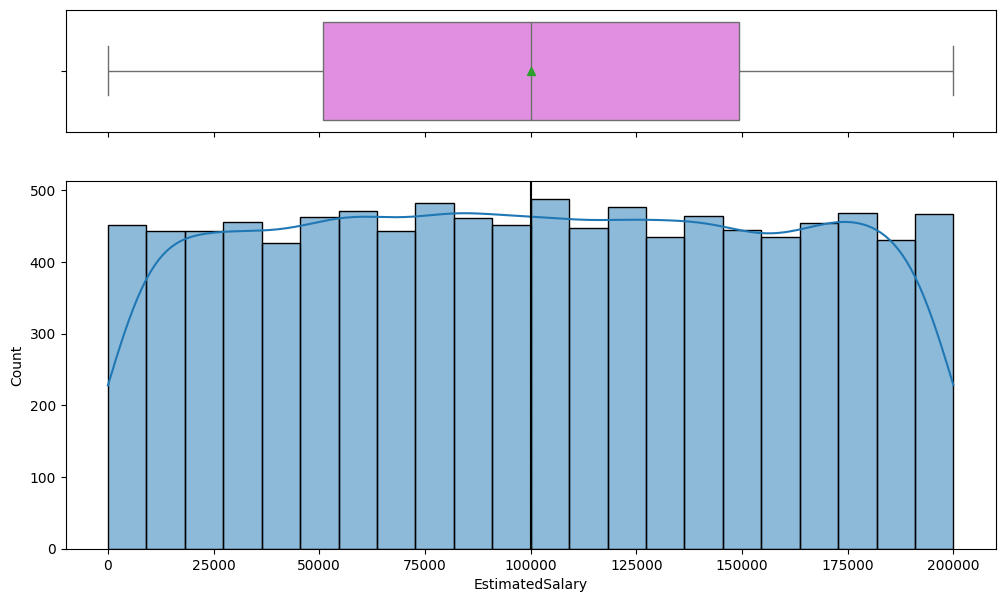

In [82]:
histogram_boxplot(bank_data, 'EstimatedSalary',kde=True)

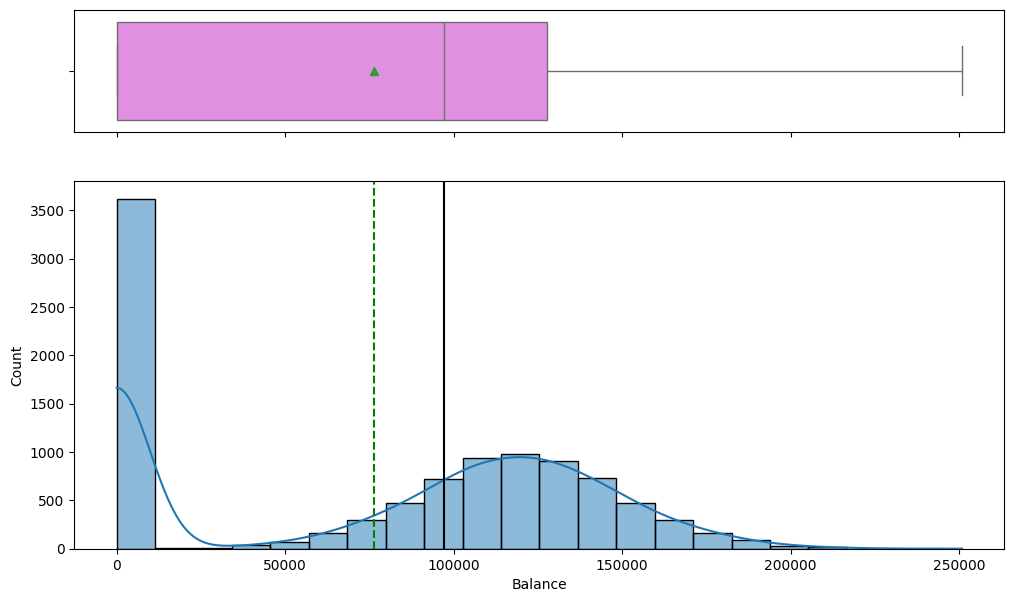

In [77]:
histogram_boxplot(bank_data, 'Balance',kde=True)

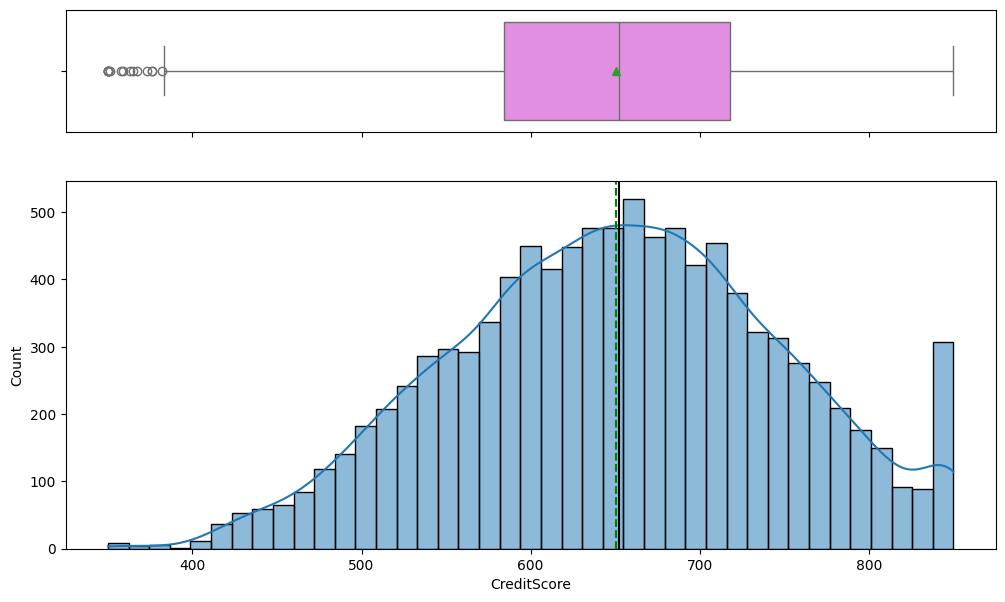

In [125]:
histogram_boxplot(bank_data, 'CreditScore',kde=True)

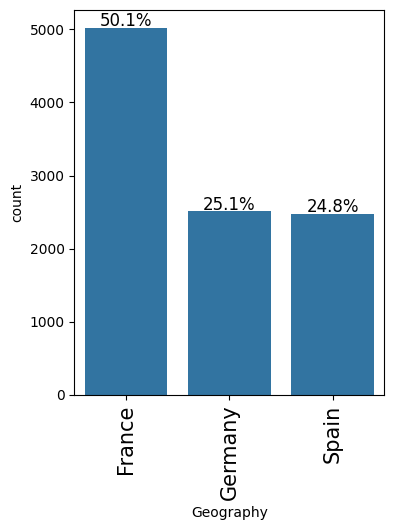

In [71]:
labeled_barplot(bank_data, "Geography",perc=True)

### Bivariate Analysis

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


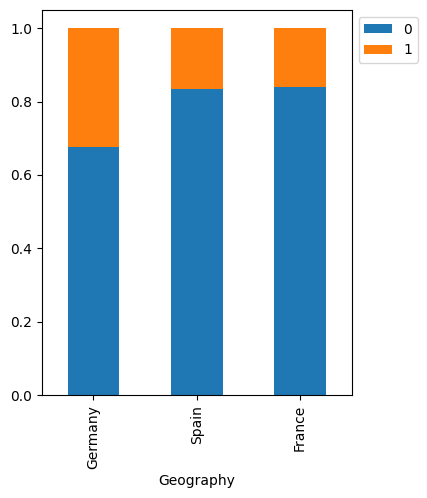

In [78]:
stacked_barplot(bank_data, 'Geography','Exited')

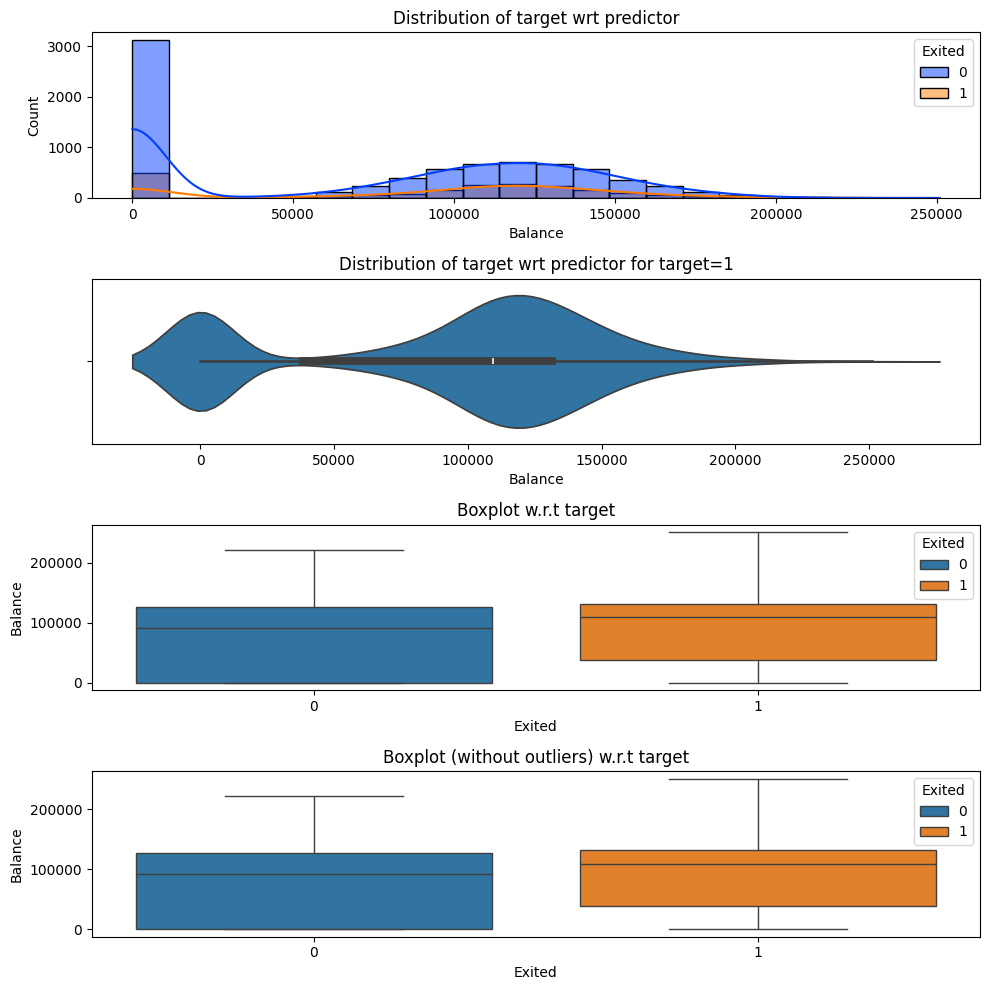

In [120]:
distribution_plot_wrt_target(bank_data, 'Balance','Exited')

* Number of exited customers seems to maximize at 0 balance and between 100000-150000. As shown in the violin plot.
* But this is similar to the overall distribution of Balance in the dataset. So not sure if that's a correlation.

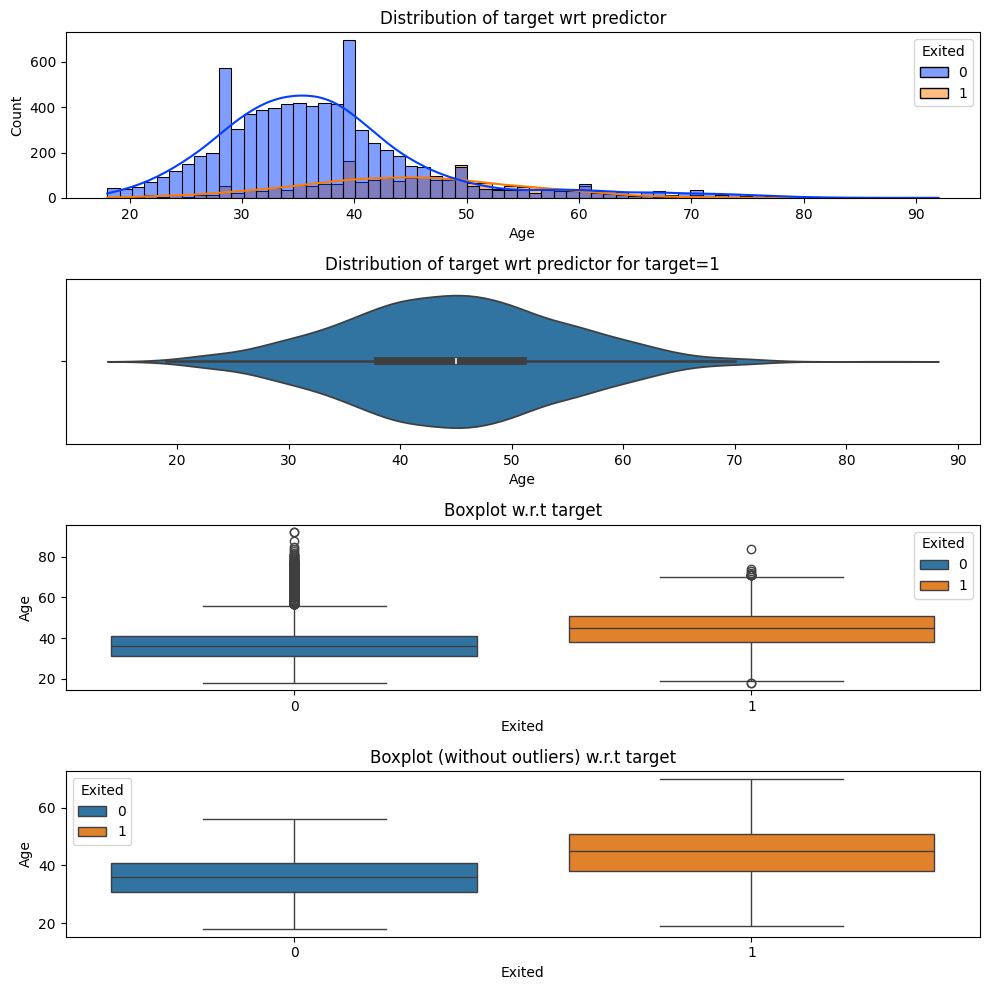

In [121]:
distribution_plot_wrt_target(bank_data, 'Age','Exited')

* Much of the exited customers seem to fall between 40 to 50. 
* The overall number of customers seems to peak around 38-40,as seen in univariate distribution of Age. 
* But exited customers are markedly between 40 to 50; peaking around 45.

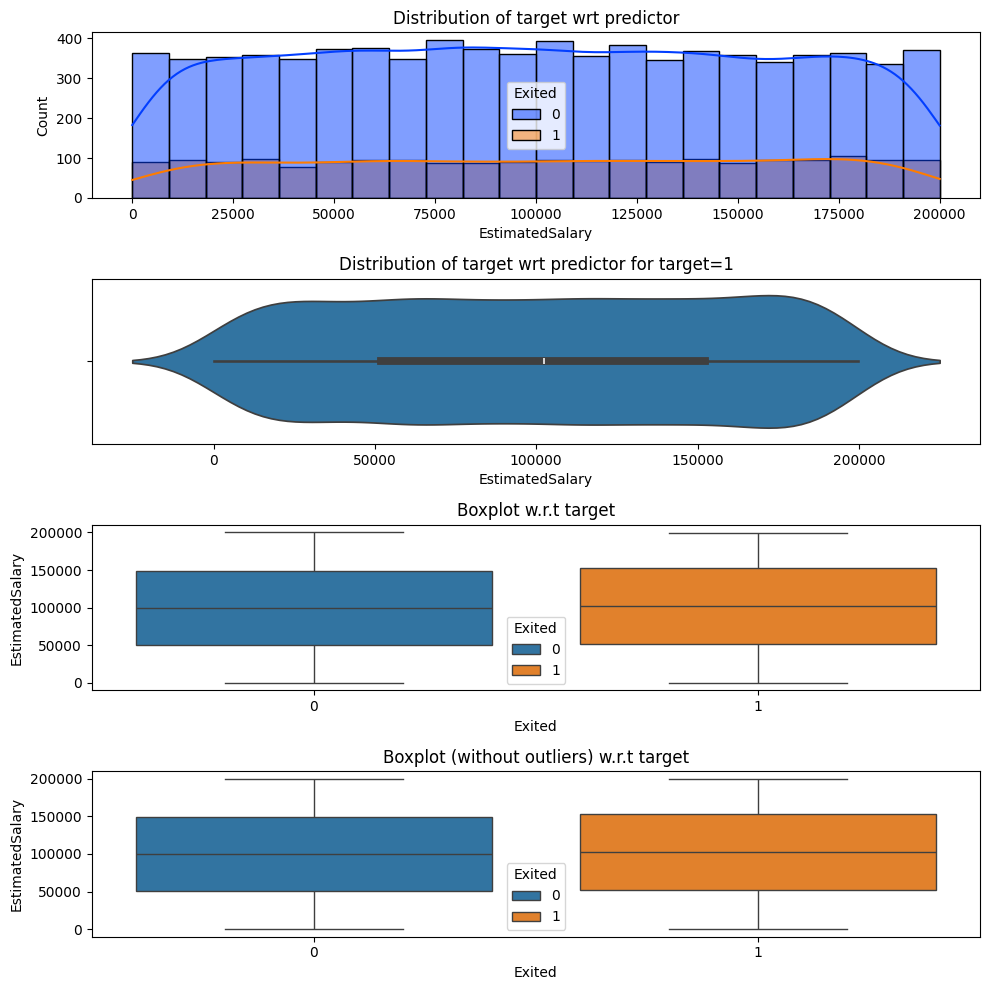

In [123]:
distribution_plot_wrt_target(bank_data, 'EstimatedSalary','Exited')

* EstimatedSalary also doesn't seem to indicate much about the target variable. Both exited and non-exited customers seem to be equally distributed wrt EstimatedSalary. Its also similar to the overall distribution of EstimatedSalary in the dataset. 

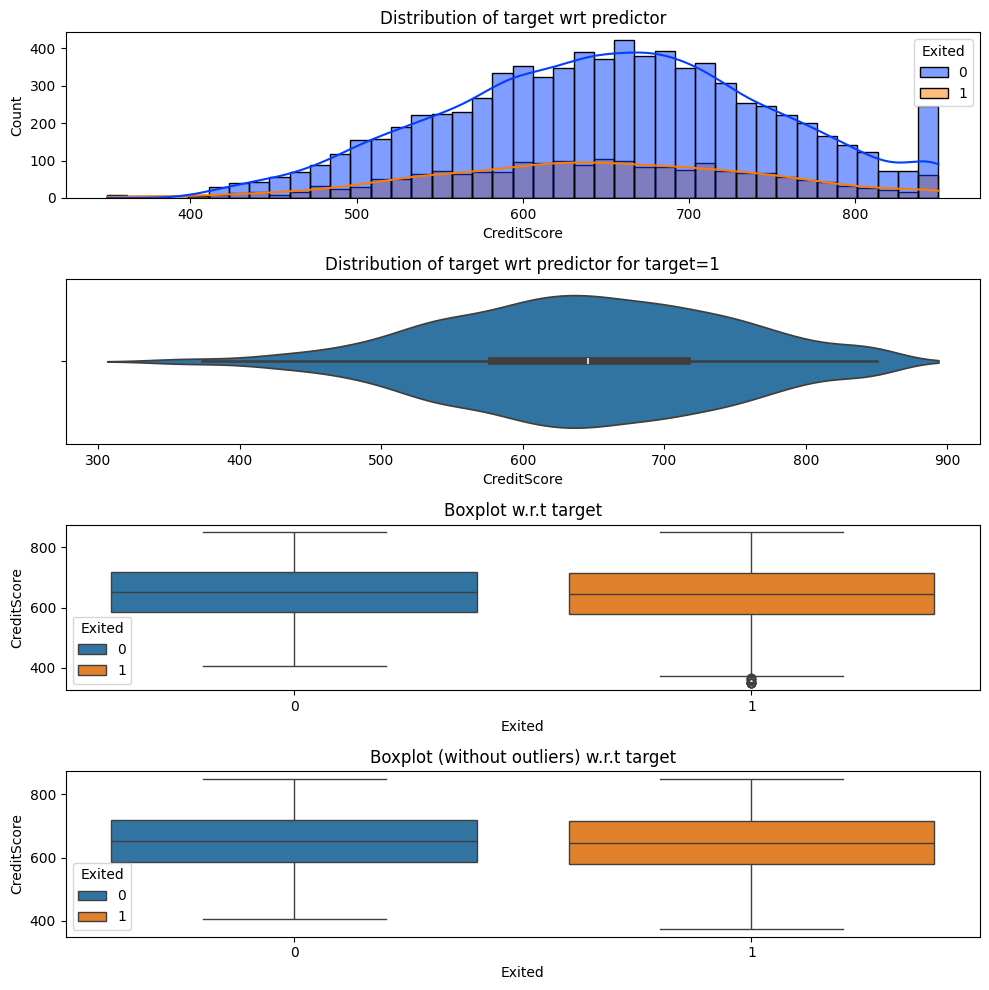

In [124]:
distribution_plot_wrt_target(bank_data, 'CreditScore','Exited')

* CreditScore also doesn't seem to indicate much about the target variable. Both exited and non-exited customers seem to be equally distributed wrt CreditScore. Its also similar to the overall distribution of CreditScore in the dataset. 

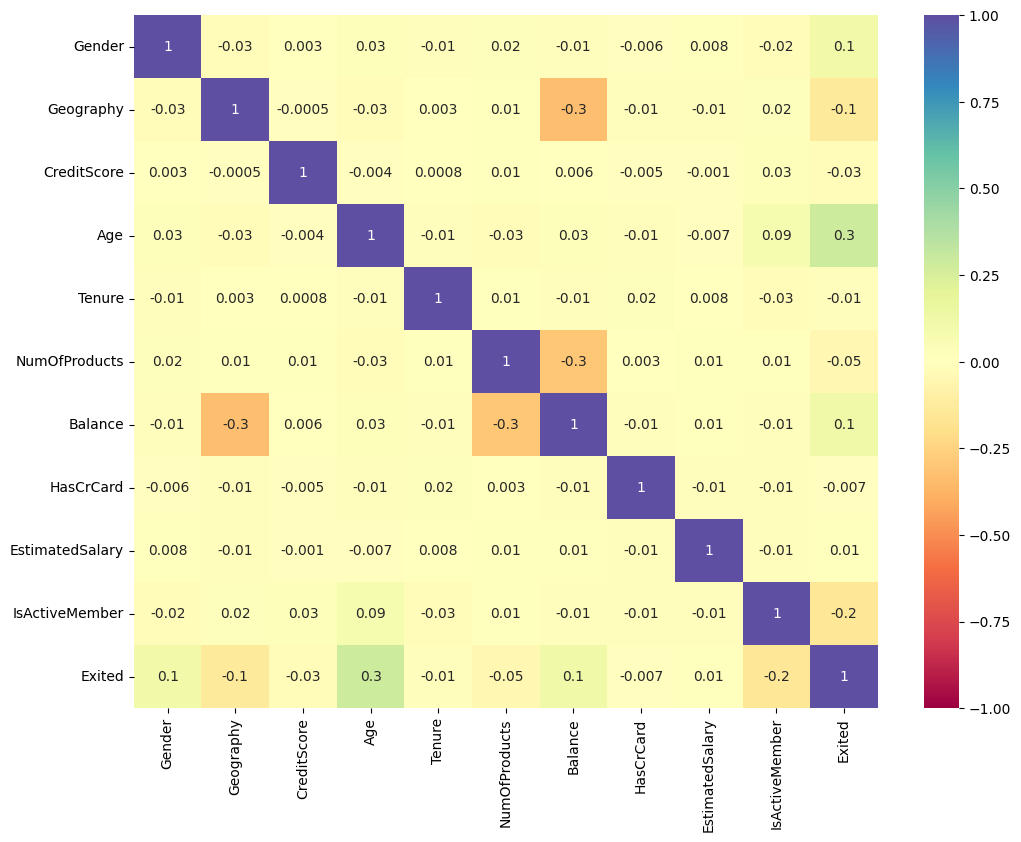

In [216]:
# replacing values to get attrition_flag into the correlation matrix
corrData = bank_data.copy()

corrData['Gender'].replace(['Male', 'Female'],[0, 1], inplace=True)
corrData['Geography'].replace(['Germany', 'France', 'Spain'],[0,1,2], inplace=True)

plt.figure(figsize=(12,9))
sns.heatmap(corrData[['Gender','Geography','CreditScore','Age','Tenure','NumOfProducts','Balance','HasCrCard','EstimatedSalary','IsActiveMember','Exited']].corr(),annot=True,vmin=-1,vmax=1,fmt='.1g',cmap="Spectral")
plt.show()


* No strong correlation anywhere.
* There only seems to be a slight positive correlation between Age and Exited. Even slighter correlation between Gender and Balance with Exited.
* Mild negative correlation between Balance and Geography; NumOfProducts and Balance.
* None of this look strong enough to make any conclusions. Will be good to let the model find finer details.

# Data Preprocessing

* There are no missing values in the dataset. No imputation required.

In [9]:
## Separating Independent and Dependent Columns
X = bank_data.drop(['Exited'],axis=1)
Y = bank_data['Exited']

### Data Normalization

In [10]:
#Standardizing the numerical variables to zero mean and unit variance.
transformer = StandardScaler()
X[["Balance","EstimatedSalary","CreditScore","Age"]] = transformer.fit_transform(X[["Balance","EstimatedSalary","CreditScore","Age"]])

In [11]:
pd.options.display.float_format = '{:.4f}'.format
X.describe().T

,count,mean,std,min,25%,50%,75%,max
CreditScore,10000.0000,-0.0000,1.0001,-3.1095,-0.6884,0.0152,0.6981,2.0639
Age,10000.0000,0.0000,1.0001,-1.9950,-0.6600,-0.1833,0.4842,5.0612
Tenure,10000.0000,5.0128,2.8922,0.0000,3.0000,5.0000,7.0000,10.0000
Balance,10000.0000,-0.0000,1.0001,-1.2258,-1.2258,0.3320,0.8199,2.7953
NumOfProducts,10000.0000,1.5302,0.5817,1.0000,1.0000,1.0000,2.0000,4.0000
HasCrCard,10000.0000,0.7055,0.4558,0.0000,0.0000,1.0000,1.0000,1.0000
IsActiveMember,10000.0000,0.5151,0.4998,0.0000,0.0000,1.0000,1.0000,1.0000
EstimatedSalary,10000.0000,-0.0000,1.0001,-1.7403,-0.8536,0.0018,0.8572,1.7372


* Now the data seems much more normalized than what appeared in the initial describe() where the values of
Balance, EstimatedSalary and CreditScore were quite different from values of Age, Tenure and NumOfProducts.

### Dummy Variable Creation

In [12]:
# Encoding the categorical variables using one-hot encoding
X = pd.get_dummies(
    X,
    columns=["Geography","Gender","HasCrCard","IsActiveMember","Tenure","NumOfProducts"],
    drop_first=True,
)

In [282]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   EstimatedSalary    10000 non-null  float64
 4   Geography_Germany  10000 non-null  uint8  
 5   Geography_Spain    10000 non-null  uint8  
 6   Gender_Male        10000 non-null  uint8  
 7   HasCrCard_1        10000 non-null  uint8  
 8   IsActiveMember_1   10000 non-null  uint8  
 9   Tenure_1           10000 non-null  uint8  
 10  Tenure_2           10000 non-null  uint8  
 11  Tenure_3           10000 non-null  uint8  
 12  Tenure_4           10000 non-null  uint8  
 13  Tenure_5           10000 non-null  uint8  
 14  Tenure_6           10000 non-null  uint8  
 15  Tenure_7           10000 non-null  uint8  
 16  Tenure_8           1000

* Created dummy variables for categorical variables.

### Train-validation-test Split

In [13]:
# Splitting the dataset into the Training and Test set.
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42,stratify = Y)

In [14]:
# Splitting the Train dataset into the Training and Validation set.
X_train, X_valid, y_train, y_valid = train_test_split(X_train,y_train, test_size = 0.2, random_state = 42,stratify = y_train)

In [15]:
#Printing the shapes.
print(X_train.shape,y_train.shape)
print(X_valid.shape,y_valid.shape)
print(X_test.shape,y_test.shape)

(6400, 22) (6400,)
(1600, 22) (1600,)
(2000, 22) (2000,)


In [16]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  float64
 1   Age                10000 non-null  float64
 2   Balance            10000 non-null  float64
 3   EstimatedSalary    10000 non-null  float64
 4   Geography_Germany  10000 non-null  uint8  
 5   Geography_Spain    10000 non-null  uint8  
 6   Gender_Male        10000 non-null  uint8  
 7   HasCrCard_1        10000 non-null  uint8  
 8   IsActiveMember_1   10000 non-null  uint8  
 9   Tenure_1           10000 non-null  uint8  
 10  Tenure_2           10000 non-null  uint8  
 11  Tenure_3           10000 non-null  uint8  
 12  Tenure_4           10000 non-null  uint8  
 13  Tenure_5           10000 non-null  uint8  
 14  Tenure_6           10000 non-null  uint8  
 15  Tenure_7           10000 non-null  uint8  
 16  Tenure_8           1000

## Model Building

### Model Evaluation Criterion

In this scenario, 

* False negative - is when model classifies a customer will not leave, but the customer actually leaves. This will be a loss to the bank.
* False positive - is when model classifies a customer will leave, but the customer does not leave. This will not be a greater loss to the bank compared to a customer leaving.

So the cost of False negatives is greater than cost of False positives. Hence Recall is the right measure for evaluating the models.


## Utility functions

In [17]:
def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss or Accuracy
    """
    fig, ax = plt.subplots() #Creating a subplot with figure and axes.
    plt.plot(history.history[name]) #Plotting the train accuracy or train loss
    plt.plot(history.history['val_'+name]) #Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize()) #Defining the title of the plot.
    plt.ylabel(name.capitalize()) #Capitalizing the first letter.
    plt.xlabel('Epoch') #Defining the label for the x-axis.
    fig.legend(['Train', 'Validation'], loc="outside right upper") #Defining the legend, loc controls the position of the legend.

In [18]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification(
    model, predictors, target, threshold=0.5
):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred = model.predict(predictors) > threshold
    # pred_temp = model.predict(predictors) > threshold
    # # rounding off the above values to get classes
    # pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred, average='weighted')  # to compute Recall
    precision = precision_score(target, pred, average='weighted')  # to compute Precision
    f1 = f1_score(target, pred, average='weighted')  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1 Score": f1,},
        index=[0],
    )

    return df_perf

In [19]:
# Calculate class weights for imbalanced dataset
cw = (y_train.shape[0]) / np.bincount(y_train)

# Create a dictionary mapping class indices to their respective class weights
cw_dict = {}
for i in range(cw.shape[0]):
    cw_dict[i] = cw[i]

cw_dict

{0: 1.2558869701726845, 1: 4.9079754601226995}

In [20]:
# defining the batch size and # epochs upfront as we'll be using the same values for all models
epochs = 25
batch_size = 64

### Neural Network with SGD Optimizer

In [30]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [31]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [33]:
model.compile(loss='binary_crossentropy', optimizer='sgd')

In [34]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.2596 - val_loss: 0.6037
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 1.1751 - val_loss: 0.5719
Epoch 3/25
100/100 [==============================] - 0s 3ms/step - loss: 1.1217 - val_loss: 0.5521
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0896 - val_loss: 0.5339
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0686 - val_loss: 0.5241
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0522 - val_loss: 0.5106
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0393 - val_loss: 0.5212
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0292 - val_loss: 0.5084
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0200 - val_loss: 0.5225
Epoch 10/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0134 - val_loss: 0.5054

In [35]:
print("Time taken in seconds ",end-start)

Time taken in seconds  7.158735036849976


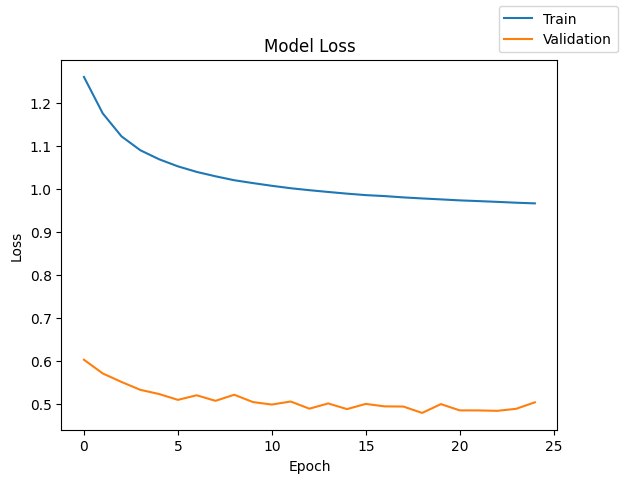

In [36]:
plot(history,'loss')

In [37]:
model_0_train_perf = model_performance_classification(model, X_train, y_train)
model_0_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7638,0.7638,0.8362,0.7833


In [38]:
model_0_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_0_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7581,0.7581,0.8309,0.7781


### Model 1 - SGD with momentum

In [39]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

In [40]:
#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [42]:
optimizer = tf.keras.optimizers.SGD(momentum=0.9)    # defining SGD as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

In [43]:
start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight = cw_dict)
end=time.time()

Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.2636 - val_loss: 0.5541
Epoch 2/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0566 - val_loss: 0.4941
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0123 - val_loss: 0.5138
Epoch 4/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9849 - val_loss: 0.5403
Epoch 5/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9758 - val_loss: 0.4311
Epoch 6/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9657 - val_loss: 0.4869
Epoch 7/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9548 - val_loss: 0.4494
Epoch 8/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9539 - val_loss: 0.4939
Epoch 9/25
100/100 [==============================] - 0s 2ms/step - loss: 0.9425 - val_loss: 0.5646
Epoch 10/25
100/100 [==============================] - 0s 3ms/step - loss: 0.9449 - val_loss: 0.4809

In [44]:
print("Time taken in seconds ",end-start)

Time taken in seconds  6.46076512336731


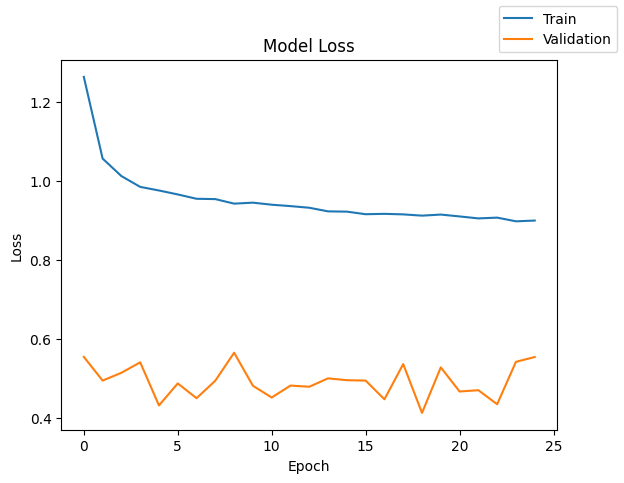

In [45]:
plot(history,'loss')

In [46]:
model_1_train_perf = model_performance_classification(model, X_train, y_train)
model_1_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7652,0.7652,0.8480,0.7856


In [47]:
model_1_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_1_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7512,0.7512,0.8336,0.7728


* Recall has not changed much at all. SGD with momentum is not making a difference. Lets check other optimizers.

## Model Performance Improvement

### Neural Network with Adam Optimizer

In [50]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
100/100 [==============================] - 1s 4ms/step - loss: 1.3129 - val_loss: 0.5983
Epoch 2/25
100/100 [==============================] - 0s 4ms/step - loss: 1.1733 - val_loss: 0.5546
Epoch 3/25
100/100 [==============================] - 0s 2ms/step - loss: 1.0938 - val_los

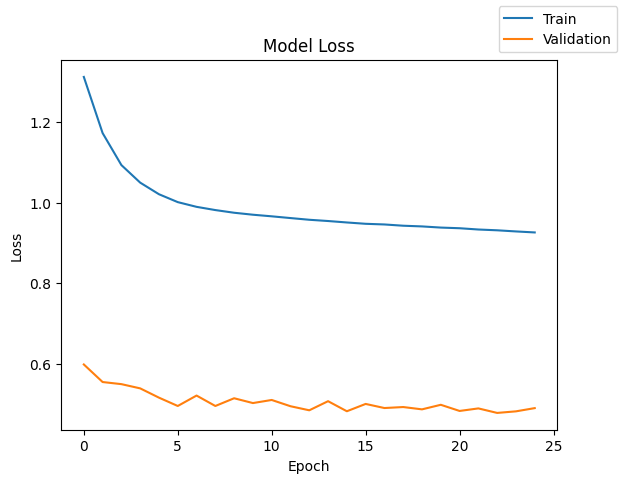

In [51]:
plot(history,'loss')

In [52]:
model_2_train_perf = model_performance_classification(model, X_train, y_train)
model_2_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7833,0.7833,0.8401,0.7995


In [53]:
model_2_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_2_valid_perf

50/50 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7744,0.7744,0.8281,0.7907


* There is a slight improvement in Recall scores. Difference between training and validation sets has not changed much.

### Neural Network with Adam Optimizer and Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
100/100 [======

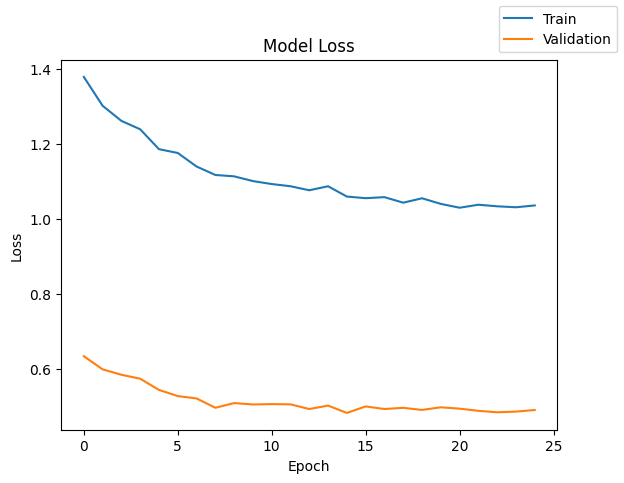

In [54]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [55]:
model_3_train_perf = model_performance_classification(model, X_train, y_train)
model_3_train_perf

200/200 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7861,0.7861,0.8386,0.8015


In [56]:
model_3_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_3_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7769,0.7769,0.8278,0.7926


### Neural Network with Balanced Data (by applying SMOTE) and SGD Optimizer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
160/160 [==============================] - 1s 3ms/step - loss: 1.5828 - val_loss: 1.0843
Epoch 2/25
160/160 [==============================] - 0s 2ms/step - loss: 1.2701 - val_loss: 0.9276
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 1.1614 - val_los

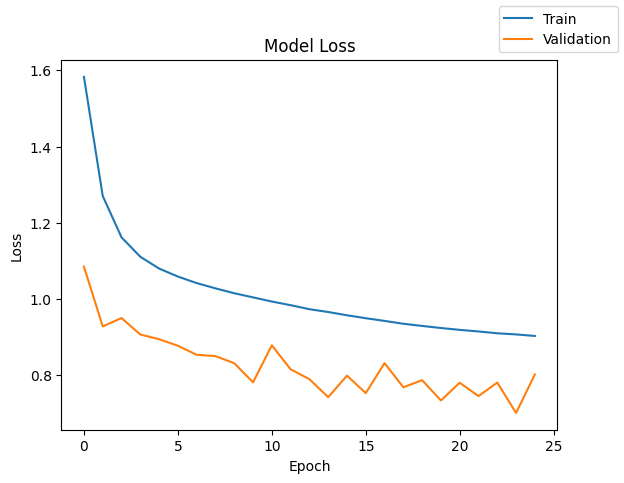

In [58]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(random_state=1)
X_train_balanced, y_train_balanced = sm.fit_resample(X_train, y_train)

# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

model.summary()

model.compile(loss='binary_crossentropy', optimizer='sgd')

start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [60]:
model_4_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_4_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7563,0.7563,0.8114,0.7450


In [61]:
model_4_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_4_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.6056,0.6056,0.8273,0.6409


### Neural Network with Balanced Data (by applying SMOTE) and Adam Optimizer

In [62]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dense(7,activation="relu"))
model.add(Dense(1,activation="sigmoid"))
model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
160/160 [==============================] - 2s 3ms/step - loss: 1.5917 - val_loss: 1.1247
Epoch 2/25
160/160 [==============================] - 0s 2ms/step - loss: 1.3032 - val_loss: 1.0732
Epoch 3/25
160/160 [==============================] - 0s 2ms/step - loss: 1.2180 - val_los

In [63]:
model_5_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_5_train_perf

319/319 [==============================] - 1s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7943,0.7943,0.8292,0.7886


In [64]:
model_5_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_5_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.6650,0.6650,0.8299,0.6975


### Neural Network with Balanced Data (by applying SMOTE), Adam Optimizer, and Dropout

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
160/160 [======

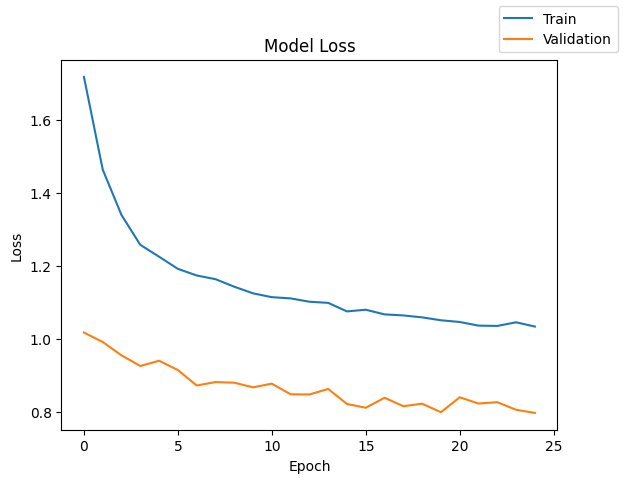

In [65]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [66]:
model_6_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_6_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7441,0.7441,0.8034,0.7310


In [67]:
model_6_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_6_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5881,0.5881,0.8272,0.6233


### Neural network with Adam optimizer, Dropout and He initializer

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
100/100 [======

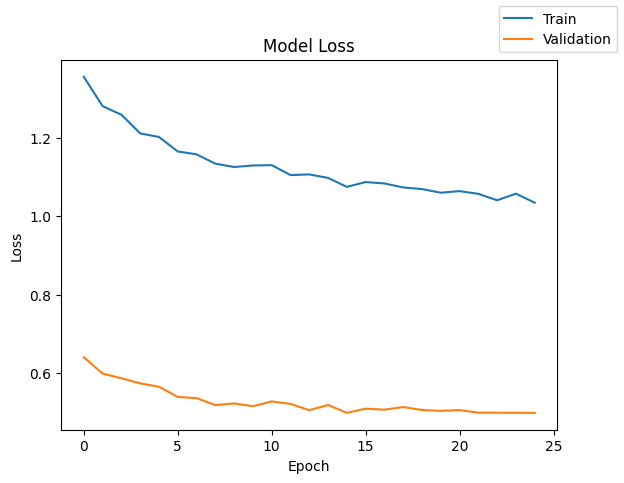

In [102]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [103]:
model_7_train_perf = model_performance_classification(model, X_train, y_train)
model_7_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7680,0.7680,0.8340,0.7865


In [104]:
model_7_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_7_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7638,0.7638,0.8322,0.7828


### Neural network with Adam optimizer, Dropout and He initializer (with balanced data using SMOTE)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
160/160 [======

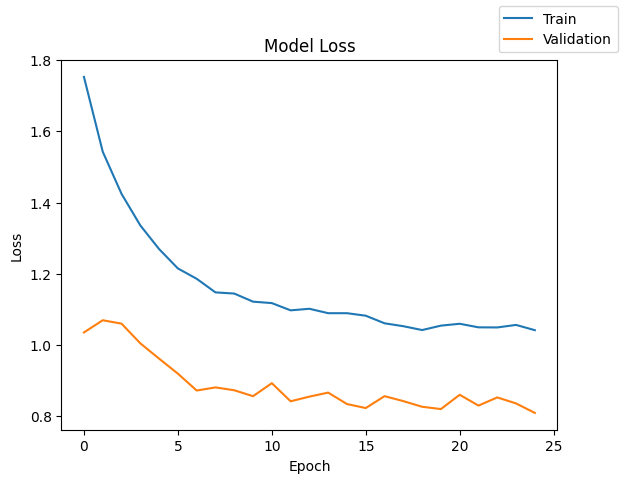

In [82]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model = Sequential()
model.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model.add(Dropout(0.4))
model.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

model.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model.fit(X_train_balanced, y_train_balanced, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [83]:
model_8_train_perf = model_performance_classification(model, X_train_balanced, y_train_balanced)
model_8_train_perf

319/319 [==============================] - 0s 1ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7409,0.7409,0.8049,0.7265


In [84]:
model_8_valid_perf = model_performance_classification(model, X_valid, y_valid)
model_8_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.5837,0.5837,0.8287,0.6187


## Model Performance Comparison and Final Model Selection

### Performance Comparison

In [94]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        model_0_train_perf.T,
        model_1_train_perf.T,
        model_2_train_perf.T,
        model_3_train_perf.T,
        model_4_train_perf.T,
        model_5_train_perf.T,
        model_6_train_perf.T,
        model_7_train_perf.T,
        model_8_train_perf.T
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Model 0 : Neural Network (SGD)",
    "Model 1 : Neural Network (SGD with Momentum)",
    "Model 2 : Neural Network (Adam)",
    "Model 3 : Neural Network (Adam, dropout [0.4,0.2])",
    "Model 4 : Neural Network (SGD, Balanced data using SMOTE)",
    "Model 5 : Neural Network (Adam , Balanced data using SMOTE)",
    "Model 6 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE)",
    "Model 7 : Neural Network (Adam, dropout [0.4,0.2], with He initializer)",
    "Model 8 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE, with He initializer)",
]

In [95]:
#Validation performance comparison

models_valid_comp_df = pd.concat(
    [
        model_0_valid_perf.T,
        model_1_valid_perf.T,
        model_2_valid_perf.T,
        model_3_valid_perf.T,
        model_4_valid_perf.T,
        model_5_valid_perf.T,
        model_6_valid_perf.T,
        model_7_valid_perf.T,
        model_8_valid_perf.T
    ],
    axis=1,
)
models_valid_comp_df.columns = [
   "Model 0 : Neural Network (SGD)",
    "Model 1 : Neural Network (SGD with Momentum)",
    "Model 2 : Neural Network (Adam)",
    "Model 3 : Neural Network (Adam, dropout [0.4,0.2])",
    "Model 4 : Neural Network (SGD, Balanced data using SMOTE)",
    "Model 5 : Neural Network (Adam , Balanced data using SMOTE)",
    "Model 6 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE)",
    "Model 7 : Neural Network (Adam, dropout [0.4,0.2], with He initializer)",
    "Model 8 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE, with He initializer)",
]

In [96]:
models_train_comp_df

,Model 0 : Neural Network (SGD),Model 1 : Neural Network (SGD with Momentum),Model 2 : Neural Network (Adam),"Model 3 : Neural Network (Adam, dropout [0.4,0.2])","Model 4 : Neural Network (SGD, Balanced data using SMOTE)","Model 5 : Neural Network (Adam , Balanced data using SMOTE)","Model 6 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE)","Model 7 : Neural Network (Adam, dropout [0.4,0.2], with He initializer)","Model 8 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE, with He initializer)"
Accuracy,0.7638,0.7652,0.7833,0.7861,0.7563,0.7943,0.7441,0.7822,0.7409
Recall,0.7638,0.7652,0.7833,0.7861,0.7563,0.7943,0.7441,0.7822,0.7409
Precision,0.8362,0.8480,0.8401,0.8386,0.8114,0.8292,0.8034,0.8331,0.8049
F1 Score,0.7833,0.7856,0.7995,0.8015,0.7450,0.7886,0.7310,0.7976,0.7265


In [97]:
models_valid_comp_df

,Model 0 : Neural Network (SGD),Model 1 : Neural Network (SGD with Momentum),Model 2 : Neural Network (Adam),"Model 3 : Neural Network (Adam, dropout [0.4,0.2])","Model 4 : Neural Network (SGD, Balanced data using SMOTE)","Model 5 : Neural Network (Adam , Balanced data using SMOTE)","Model 6 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE)","Model 7 : Neural Network (Adam, dropout [0.4,0.2], with He initializer)","Model 8 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE, with He initializer)"
Accuracy,0.7581,0.7512,0.7744,0.7769,0.6056,0.6650,0.5881,0.7819,0.5837
Recall,0.7581,0.7512,0.7744,0.7769,0.6056,0.6650,0.5881,0.7819,0.5837
Precision,0.8309,0.8336,0.8281,0.8278,0.8273,0.8299,0.8272,0.8285,0.8287
F1 Score,0.7781,0.7728,0.7907,0.7926,0.6409,0.6975,0.6233,0.7966,0.6187


In [98]:
models_train_comp_df.loc["Recall"] - models_valid_comp_df.loc["Recall"]

Model 0 : Neural Network (SGD)                                                                       0.0056
Model 1 : Neural Network (SGD with Momentum)                                                         0.0139
Model 2 : Neural Network (Adam)                                                                      0.0089
Model 3 : Neural Network (Adam, dropout [0.4,0.2])                                                   0.0092
Model 4 : Neural Network (SGD, Balanced data using SMOTE)                                            0.1507
Model 5 : Neural Network (Adam , Balanced data using SMOTE)                                          0.1293
Model 6 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE)                        0.1560
Model 7 : Neural Network (Adam, dropout [0.4,0.2], with He initializer)                              0.0003
Model 8 : Neural Network (Adam, dropout [0.4,0.2], Balanced data using SMOTE, with He initializer)   0.1571
Name: Recall, dtype: float64

### Final Model Selection

* Choosing Model 7 - NN with Adam optimizer, He initializer and Dropout

### Reasoning
* Model 7 has a training performance that is among the highest (compared to Model 2, 3 and 5), but it also has the highest validation Recall score.
* Also Model 7 has the minimum difference between training and validation indicating that it is a more stable model compared to the rest.
* So choosing Model 7 as the final one.

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                322       
                                                                 
 dropout (Dropout)           (None, 14)                0         
                                                                 
 dense_1 (Dense)             (None, 7)                 105       
                                                                 
 dropout_1 (Dropout)         (None, 7)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 8         
                                                                 
Total params: 435 (1.70 KB)
Trainable params: 435 (1.70 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
100/100 [======

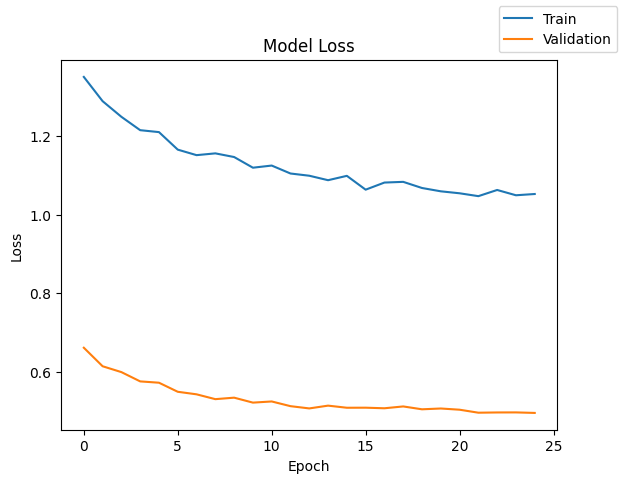

In [107]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
tf.keras.backend.clear_session()

#Initializing the neural network
model_final = Sequential()
model_final.add(Dense(14,activation="relu",kernel_initializer="he_normal",input_dim=X_train.shape[1]))
model_final.add(Dropout(0.4))
model_final.add(Dense(7,activation="relu",kernel_initializer="he_normal"))
model_final.add(Dropout(0.2))
model_final.add(Dense(1,activation="sigmoid",kernel_initializer="he_normal"))

model_final.summary()

optimizer = tf.keras.optimizers.Adam()    # defining Adam as the optimizer to be used
model_final.compile(loss='binary_crossentropy', optimizer=optimizer)

start = time.time()
history = model_final.fit(X_train, y_train, validation_data=(X_valid,y_valid) , batch_size=batch_size, epochs=epochs,class_weight=cw_dict)
end=time.time()

print("Time taken in seconds ",end-start)

plot(history,'loss')

In [108]:
model_final_train_perf = model_performance_classification(model_final, X_train, y_train)
model_final_train_perf

200/200 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7920,0.7920,0.8363,0.8058


In [109]:
model_final_valid_perf = model_performance_classification(model_final, X_valid, y_valid)
model_final_valid_perf

50/50 [==============================] - 0s 2ms/step


,Accuracy,Recall,Precision,F1 Score
0,0.7819,0.7819,0.8292,0.7967


In [110]:
y_train_pred = model_final.predict(X_train)
y_valid_pred = model_final.predict(X_valid)
y_test_pred = model_final.predict(X_test)

63/63 [==============================] - 0s 2ms/step


In [111]:
print("Classification Report - Train data",end="\n\n")
cr = classification_report(y_train,y_train_pred>0.5)
print(cr)

Classification Report - Train data

              precision    recall  f1-score   support

           0       0.92      0.80      0.86      5096
           1       0.49      0.74      0.59      1304

    accuracy                           0.79      6400
   macro avg       0.71      0.77      0.73      6400
weighted avg       0.84      0.79      0.81      6400



In [112]:
print("Classification Report - Validation data",end="\n\n")
cr = classification_report(y_valid,y_valid_pred>0.5)
print(cr)

Classification Report - Validation data

              precision    recall  f1-score   support

           0       0.92      0.80      0.85      1274
           1       0.48      0.73      0.58       326

    accuracy                           0.78      1600
   macro avg       0.70      0.76      0.71      1600
weighted avg       0.83      0.78      0.80      1600



In [113]:
print("Classification Report - Test data",end="\n\n")
cr = classification_report(y_test,y_test_pred>0.5)
print(cr)

Classification Report - Test data

              precision    recall  f1-score   support

           0       0.92      0.79      0.85      1593
           1       0.47      0.72      0.57       407

    accuracy                           0.78      2000
   macro avg       0.69      0.76      0.71      2000
weighted avg       0.83      0.78      0.79      2000



#### Observations on test performance

* The weighted average Recall score on the test set is ~0.78
* This is very close to the training and validation weighted average scores too. Indicating a robust model that performs equally well on the test set

In [117]:
! pip install shap

In [125]:
import shap

# Initialize SHAP explainer
explainer = shap.Explainer(model_final.predict, X_train)

# Compute SHAP values for the test set
shap_values = explainer.shap_values(X_test)

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   0%|                  | 7/2000 [00:00<?, ?it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   0%|          | 9/2000 [00:11<15:25,  2.15it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   0%|         | 10/2000 [00:12<21:02,  1.58it/s]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 11/2000 [00:13<22:57,  1.44it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 12/2000 [00:14<24:50,  1.33it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 13/2000 [00:14<25:34,  1.29it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 14/2000 [00:15<27:12,  1.22it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|         | 15/2000 [00:16<31:11,  1.06it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|         | 16/2000 [00:18<33:02,  1.00it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|         | 17/2000 [00:19<31:54,  1.04it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|         | 18/2000 [00:19<31:28,  1.05it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 19/2000 [00:20<31:02,  1.06it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   1%|         | 20/2000 [00:22<33:22,  1.01s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 21/2000 [00:23<33:19,  1.01s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:   1%|         | 22/2000 [00:24<35:29,  1.08s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 23/2000 [00:25<33:04,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 24/2000 [00:25<32:03,  1.03it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 25/2000 [00:26<30:16,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 26/2000 [00:27<28:59,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|         | 27/2000 [00:28<29:07,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏        | 28/2000 [00:29<31:15,  1.05it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▏        | 29/2000 [00:30<31:52,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 30/2000 [00:31<32:10,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 31/2000 [00:32<31:01,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 32/2000 [00:33<30:09,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 33/2000 [00:34<28:40,  1.14it/s]

44/44 [==============================] - 0s 973us/step


PermutationExplainer explainer:   2%|▏        | 34/2000 [00:34<26:59,  1.21it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 35/2000 [00:35<26:35,  1.23it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏        | 36/2000 [00:36<26:02,  1.26it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 37/2000 [00:37<27:12,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 38/2000 [00:38<28:30,  1.15it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏        | 39/2000 [00:39<29:11,  1.12it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏        | 40/2000 [00:40<29:34,  1.10it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 41/2000 [00:41<29:40,  1.10it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏        | 42/2000 [00:42<30:53,  1.06it/s]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   2%|▏        | 43/2000 [00:42<30:56,  1.05it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 44/2000 [00:43<30:19,  1.07it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 45/2000 [00:44<29:32,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 46/2000 [00:45<28:34,  1.14it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 47/2000 [00:46<27:33,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 48/2000 [00:47<26:57,  1.21it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 49/2000 [00:47<25:43,  1.26it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▏        | 50/2000 [00:48<25:12,  1.29it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▏        | 51/2000 [00:49<25:26,  1.28it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▏        | 52/2000 [00:50<25:10,  1.29it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▏        | 53/2000 [00:50<24:44,  1.31it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   3%|▏        | 54/2000 [00:51<25:01,  1.30it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▏        | 55/2000 [00:52<24:44,  1.31it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 56/2000 [00:53<24:26,  1.33it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 57/2000 [00:53<24:18,  1.33it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 58/2000 [00:54<24:30,  1.32it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 59/2000 [00:55<24:22,  1.33it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 60/2000 [00:56<24:15,  1.33it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 61/2000 [00:56<24:20,  1.33it/s]

44/44 [==============================] - 0s 999us/step


PermutationExplainer explainer:   3%|▎        | 62/2000 [00:57<23:44,  1.36it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 63/2000 [00:58<23:50,  1.35it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 64/2000 [00:59<23:55,  1.35it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 65/2000 [00:59<24:10,  1.33it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 66/2000 [01:00<24:42,  1.30it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 67/2000 [01:01<24:41,  1.30it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 68/2000 [01:02<24:26,  1.32it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎        | 69/2000 [01:02<24:31,  1.31it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 70/2000 [01:03<24:16,  1.33it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 71/2000 [01:04<24:19,  1.32it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 72/2000 [01:05<24:26,  1.31it/s]

53/53 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 73/2000 [01:06<25:03,  1.28it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 74/2000 [01:06<24:53,  1.29it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 75/2000 [01:07<25:07,  1.28it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 76/2000 [01:08<25:17,  1.27it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 77/2000 [01:09<24:57,  1.28it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 78/2000 [01:09<24:37,  1.30it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 79/2000 [01:10<24:38,  1.30it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 80/2000 [01:11<24:34,  1.30it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 81/2000 [01:12<24:46,  1.29it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 82/2000 [01:12<24:17,  1.32it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▎        | 83/2000 [01:13<24:25,  1.31it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 84/2000 [01:14<23:56,  1.33it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 85/2000 [01:15<24:59,  1.28it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 86/2000 [01:16<25:41,  1.24it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 87/2000 [01:16<25:39,  1.24it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 88/2000 [01:17<26:38,  1.20it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 89/2000 [01:18<26:52,  1.19it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍        | 90/2000 [01:19<27:06,  1.17it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 91/2000 [01:20<27:13,  1.17it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 92/2000 [01:21<27:20,  1.16it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 93/2000 [01:22<27:19,  1.16it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 94/2000 [01:22<26:41,  1.19it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 95/2000 [01:23<26:51,  1.18it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 96/2000 [01:24<27:18,  1.16it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 97/2000 [01:25<27:41,  1.15it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 98/2000 [01:26<27:49,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍        | 99/2000 [01:27<27:29,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 100/2000 [01:28<27:07,  1.17it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 101/2000 [01:29<26:51,  1.18it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 102/2000 [01:29<27:10,  1.16it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 103/2000 [01:30<27:31,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 104/2000 [01:31<27:21,  1.15it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 105/2000 [01:32<30:42,  1.03it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 106/2000 [01:33<29:50,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 107/2000 [01:34<28:45,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 108/2000 [01:35<28:30,  1.11it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍       | 109/2000 [01:36<27:55,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 110/2000 [01:37<27:43,  1.14it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 111/2000 [01:38<27:43,  1.14it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 112/2000 [01:38<27:35,  1.14it/s]

44/44 [==============================] - 0s 6ms/step


PermutationExplainer explainer:   6%|▍       | 113/2000 [01:40<33:57,  1.08s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▍       | 114/2000 [01:41<32:20,  1.03s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   6%|▍       | 115/2000 [01:42<31:38,  1.01s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 116/2000 [01:43<30:02,  1.05it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 117/2000 [01:44<29:14,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 118/2000 [01:44<28:28,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 119/2000 [01:45<28:05,  1.12it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 120/2000 [01:46<27:46,  1.13it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 121/2000 [01:47<27:17,  1.15it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 122/2000 [01:48<26:36,  1.18it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 123/2000 [01:49<26:08,  1.20it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▍       | 124/2000 [01:49<26:12,  1.19it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 125/2000 [01:50<26:13,  1.19it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 126/2000 [01:51<26:32,  1.18it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 127/2000 [01:52<27:25,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 128/2000 [01:53<27:16,  1.14it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 129/2000 [01:54<27:21,  1.14it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌       | 130/2000 [01:55<27:06,  1.15it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 131/2000 [01:56<27:04,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 132/2000 [01:56<27:09,  1.15it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 133/2000 [01:57<27:17,  1.14it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 134/2000 [01:58<28:49,  1.08it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   7%|▌       | 135/2000 [01:59<27:40,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 136/2000 [02:00<26:34,  1.17it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 137/2000 [02:01<25:55,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 138/2000 [02:02<25:32,  1.22it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 139/2000 [02:02<25:03,  1.24it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 140/2000 [02:03<24:29,  1.27it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 141/2000 [02:04<24:29,  1.26it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 142/2000 [02:05<24:27,  1.27it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 143/2000 [02:05<24:41,  1.25it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 144/2000 [02:06<25:18,  1.22it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 145/2000 [02:07<25:11,  1.23it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 146/2000 [02:08<24:50,  1.24it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 147/2000 [02:09<24:43,  1.25it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 148/2000 [02:09<24:20,  1.27it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▌       | 149/2000 [02:10<24:40,  1.25it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 150/2000 [02:11<24:09,  1.28it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 151/2000 [02:12<23:56,  1.29it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 152/2000 [02:13<24:14,  1.27it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 153/2000 [02:13<24:10,  1.27it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 154/2000 [02:14<23:37,  1.30it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 155/2000 [02:15<24:04,  1.28it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▌       | 156/2000 [02:16<24:36,  1.25it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 157/2000 [02:17<30:34,  1.00it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 158/2000 [02:19<33:25,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 159/2000 [02:20<35:04,  1.14s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 160/2000 [02:21<34:03,  1.11s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 161/2000 [02:22<33:30,  1.09s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 162/2000 [02:23<33:16,  1.09s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:   8%|▋       | 163/2000 [02:24<32:09,  1.05s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 164/2000 [02:25<31:12,  1.02s/it]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 165/2000 [02:26<30:17,  1.01it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 166/2000 [02:27<28:48,  1.06it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 167/2000 [02:28<28:13,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 168/2000 [02:28<27:22,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 169/2000 [02:29<26:27,  1.15it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▋       | 170/2000 [02:30<25:57,  1.17it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 171/2000 [02:31<25:37,  1.19it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 172/2000 [02:32<25:23,  1.20it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 173/2000 [02:32<24:34,  1.24it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 174/2000 [02:33<24:07,  1.26it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 175/2000 [02:34<23:56,  1.27it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 176/2000 [02:35<23:27,  1.30it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 177/2000 [02:35<23:23,  1.30it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 178/2000 [02:36<23:15,  1.31it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 179/2000 [02:37<22:59,  1.32it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 180/2000 [02:38<23:04,  1.31it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 181/2000 [02:38<23:10,  1.31it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 182/2000 [02:39<23:04,  1.31it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 183/2000 [02:40<23:10,  1.31it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 184/2000 [02:41<23:08,  1.31it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 185/2000 [02:41<23:09,  1.31it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 186/2000 [02:42<23:27,  1.29it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▋       | 187/2000 [02:43<24:20,  1.24it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊       | 188/2000 [02:44<24:24,  1.24it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   9%|▊       | 189/2000 [02:45<24:35,  1.23it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 190/2000 [02:46<24:32,  1.23it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 191/2000 [02:46<24:26,  1.23it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 192/2000 [02:47<24:09,  1.25it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 193/2000 [02:48<24:29,  1.23it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 194/2000 [02:49<23:50,  1.26it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 195/2000 [02:50<23:27,  1.28it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 196/2000 [02:50<23:21,  1.29it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 197/2000 [02:51<23:58,  1.25it/s]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 198/2000 [02:52<23:19,  1.29it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  10%|▊       | 199/2000 [02:53<24:07,  1.24it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 200/2000 [02:53<23:44,  1.26it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 201/2000 [02:54<23:38,  1.27it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 202/2000 [02:55<23:55,  1.25it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 203/2000 [02:56<24:15,  1.23it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 204/2000 [02:57<24:26,  1.22it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 205/2000 [02:58<24:39,  1.21it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 206/2000 [02:58<23:41,  1.26it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 207/2000 [02:59<23:27,  1.27it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 208/2000 [03:00<23:58,  1.25it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 209/2000 [03:01<23:58,  1.25it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  10%|▊       | 210/2000 [03:02<23:50,  1.25it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 211/2000 [03:02<23:44,  1.26it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 212/2000 [03:03<24:06,  1.24it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|▊       | 213/2000 [03:05<30:26,  1.02s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 214/2000 [03:06<32:00,  1.08s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 215/2000 [03:07<29:40,  1.00it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  11%|▊       | 216/2000 [03:07<28:03,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 217/2000 [03:08<27:01,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▊       | 218/2000 [03:09<25:55,  1.15it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 219/2000 [03:10<25:08,  1.18it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 220/2000 [03:11<24:44,  1.20it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 221/2000 [03:12<26:03,  1.14it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 222/2000 [03:13<25:59,  1.14it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 223/2000 [03:13<26:27,  1.12it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 224/2000 [03:14<26:10,  1.13it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 225/2000 [03:15<25:05,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 226/2000 [03:16<25:45,  1.15it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 227/2000 [03:17<26:34,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|▉       | 228/2000 [03:18<27:09,  1.09it/s]

42/42 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  11%|▉       | 229/2000 [03:19<28:13,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 230/2000 [03:20<27:12,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 231/2000 [03:21<27:25,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 232/2000 [03:22<27:11,  1.08it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 233/2000 [03:23<26:10,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 234/2000 [03:23<26:04,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 235/2000 [03:24<27:19,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 236/2000 [03:25<27:15,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 237/2000 [03:26<27:11,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 238/2000 [03:27<26:40,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 239/2000 [03:28<27:04,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 240/2000 [03:29<27:02,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 241/2000 [03:30<26:44,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 242/2000 [03:31<25:51,  1.13it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 243/2000 [03:32<25:37,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 244/2000 [03:32<25:57,  1.13it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 245/2000 [03:33<26:18,  1.11it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 246/2000 [03:34<26:02,  1.12it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 247/2000 [03:35<26:10,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 248/2000 [03:36<26:05,  1.12it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|▉       | 249/2000 [03:37<25:49,  1.13it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█       | 250/2000 [03:38<26:42,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 251/2000 [03:39<26:19,  1.11it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 252/2000 [03:40<26:40,  1.09it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  13%|█       | 253/2000 [03:41<26:05,  1.12it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 254/2000 [03:41<25:37,  1.14it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 255/2000 [03:42<25:28,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 256/2000 [03:43<25:48,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 257/2000 [03:44<25:31,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 258/2000 [03:45<25:18,  1.15it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 259/2000 [03:46<24:59,  1.16it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 260/2000 [03:47<24:49,  1.17it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 261/2000 [03:47<24:14,  1.20it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 262/2000 [03:48<24:40,  1.17it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 263/2000 [03:49<24:38,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 264/2000 [03:50<24:46,  1.17it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 265/2000 [03:51<24:34,  1.18it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 266/2000 [03:52<24:26,  1.18it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 267/2000 [03:53<25:03,  1.15it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 268/2000 [03:54<25:45,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█       | 269/2000 [03:54<25:45,  1.12it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 270/2000 [03:55<25:46,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 271/2000 [03:56<26:06,  1.10it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 272/2000 [03:57<25:56,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 273/2000 [03:58<26:24,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 274/2000 [03:59<26:00,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 275/2000 [04:00<25:46,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 276/2000 [04:01<26:06,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 277/2000 [04:02<25:46,  1.11it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 278/2000 [04:03<25:57,  1.11it/s]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  14%|█       | 279/2000 [04:04<26:45,  1.07it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 280/2000 [04:05<26:41,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█       | 281/2000 [04:05<26:19,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 282/2000 [04:06<26:31,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 283/2000 [04:07<26:31,  1.08it/s]

37/37 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 284/2000 [04:08<25:57,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 285/2000 [04:09<25:44,  1.11it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▏      | 286/2000 [04:10<25:44,  1.11it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 287/2000 [04:11<25:55,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 288/2000 [04:12<26:04,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▏      | 289/2000 [04:13<26:02,  1.10it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  14%|█▏      | 290/2000 [04:14<26:21,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 291/2000 [04:15<26:33,  1.07it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 292/2000 [04:16<26:25,  1.08it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 293/2000 [04:16<26:40,  1.07it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 294/2000 [04:17<26:42,  1.06it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 295/2000 [04:18<26:38,  1.07it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  15%|█▏      | 296/2000 [04:19<26:16,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 297/2000 [04:20<26:11,  1.08it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 298/2000 [04:21<26:17,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 299/2000 [04:22<28:00,  1.01it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 300/2000 [04:24<32:03,  1.13s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 301/2000 [04:25<30:46,  1.09s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 302/2000 [04:26<29:48,  1.05s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 303/2000 [04:27<28:35,  1.01s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 304/2000 [04:28<27:55,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 305/2000 [04:28<27:36,  1.02it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 306/2000 [04:29<26:58,  1.05it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 307/2000 [04:30<26:08,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 308/2000 [04:31<26:26,  1.07it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▏      | 309/2000 [04:32<25:52,  1.09it/s]

53/53 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▏      | 310/2000 [04:33<26:28,  1.06it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▏      | 311/2000 [04:34<26:42,  1.05it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▏      | 312/2000 [04:35<25:27,  1.11it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 313/2000 [04:36<25:23,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 314/2000 [04:37<25:15,  1.11it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 315/2000 [04:38<25:32,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 316/2000 [04:38<25:30,  1.10it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 317/2000 [04:39<24:43,  1.13it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▎      | 318/2000 [04:40<24:46,  1.13it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 319/2000 [04:41<24:23,  1.15it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 320/2000 [04:42<24:49,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 321/2000 [04:43<24:54,  1.12it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 322/2000 [04:44<24:53,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 323/2000 [04:45<24:51,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 324/2000 [04:45<24:20,  1.15it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 325/2000 [04:46<24:49,  1.12it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▎      | 326/2000 [04:47<25:26,  1.10it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  16%|█▎      | 327/2000 [04:48<25:11,  1.11it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 328/2000 [04:49<24:35,  1.13it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 329/2000 [04:50<23:38,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▎      | 330/2000 [04:51<23:13,  1.20it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 331/2000 [04:51<22:45,  1.22it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 332/2000 [04:52<22:28,  1.24it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 333/2000 [04:53<22:19,  1.24it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 334/2000 [04:54<23:03,  1.20it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  17%|█▎      | 335/2000 [04:55<25:35,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 336/2000 [04:56<26:41,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 337/2000 [04:57<26:04,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 338/2000 [04:58<25:19,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 339/2000 [04:59<25:20,  1.09it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 340/2000 [05:00<25:45,  1.07it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 341/2000 [05:01<25:11,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 342/2000 [05:01<24:52,  1.11it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▎      | 343/2000 [05:02<25:14,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 344/2000 [05:03<25:13,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 345/2000 [05:04<25:06,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 346/2000 [05:05<25:50,  1.07it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 347/2000 [05:06<25:29,  1.08it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 348/2000 [05:07<24:21,  1.13it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▍      | 349/2000 [05:08<24:38,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 350/2000 [05:09<25:07,  1.09it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 351/2000 [05:10<25:46,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 352/2000 [05:11<25:46,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 353/2000 [05:12<25:34,  1.07it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 354/2000 [05:13<25:26,  1.08it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 355/2000 [05:13<25:07,  1.09it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 356/2000 [05:14<25:19,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 357/2000 [05:15<25:26,  1.08it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▍      | 358/2000 [05:16<25:42,  1.06it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 359/2000 [05:17<25:51,  1.06it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▍      | 360/2000 [05:18<25:57,  1.05it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▍      | 361/2000 [05:19<26:07,  1.05it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 362/2000 [05:20<25:22,  1.08it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 363/2000 [05:21<25:17,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 364/2000 [05:22<24:52,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 365/2000 [05:23<25:00,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 366/2000 [05:24<25:04,  1.09it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  18%|█▍      | 367/2000 [05:25<25:21,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 368/2000 [05:26<25:17,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 369/2000 [05:26<25:11,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▍      | 370/2000 [05:27<25:14,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▍      | 371/2000 [05:28<25:07,  1.08it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▍      | 372/2000 [05:29<25:23,  1.07it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▍      | 373/2000 [05:30<23:58,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▍      | 374/2000 [05:31<23:26,  1.16it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 375/2000 [05:32<22:40,  1.19it/s]

48/48 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  19%|█▌      | 376/2000 [05:33<25:03,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 377/2000 [05:34<27:31,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 378/2000 [05:35<27:02,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 379/2000 [05:36<25:45,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 380/2000 [05:37<25:19,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 381/2000 [05:38<24:52,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 382/2000 [05:39<24:41,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 383/2000 [05:39<24:36,  1.10it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 384/2000 [05:40<24:26,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 385/2000 [05:41<24:24,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 386/2000 [05:42<24:30,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 387/2000 [05:43<24:45,  1.09it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▌      | 388/2000 [05:44<24:33,  1.09it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  19%|█▌      | 389/2000 [05:45<24:47,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 390/2000 [05:46<24:37,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 391/2000 [05:47<24:39,  1.09it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 392/2000 [05:48<25:01,  1.07it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  20%|█▌      | 393/2000 [05:49<25:17,  1.06it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 394/2000 [05:50<25:13,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 395/2000 [05:51<24:53,  1.07it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 396/2000 [05:52<25:18,  1.06it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 397/2000 [05:52<24:53,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 398/2000 [05:53<24:58,  1.07it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 399/2000 [05:54<24:51,  1.07it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 400/2000 [05:55<25:16,  1.05it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 401/2000 [05:56<24:21,  1.09it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 402/2000 [05:57<23:46,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 403/2000 [05:58<24:00,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 404/2000 [05:59<23:34,  1.13it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 405/2000 [06:00<24:22,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▌      | 406/2000 [06:01<24:26,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▋      | 407/2000 [06:02<24:23,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▋      | 408/2000 [06:02<24:12,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▋      | 409/2000 [06:03<24:12,  1.10it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▋      | 410/2000 [06:04<24:14,  1.09it/s]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  21%|█▋      | 411/2000 [06:05<24:56,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 412/2000 [06:06<23:49,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 413/2000 [06:07<23:11,  1.14it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 414/2000 [06:08<23:28,  1.13it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|█▋      | 415/2000 [06:09<23:33,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 416/2000 [06:10<23:51,  1.11it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 417/2000 [06:11<23:55,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 418/2000 [06:11<23:52,  1.10it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 419/2000 [06:12<24:22,  1.08it/s]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|█▋      | 420/2000 [06:13<23:57,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 421/2000 [06:14<24:20,  1.08it/s]

48/48 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  21%|█▋      | 422/2000 [06:15<26:27,  1.01s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 423/2000 [06:16<25:18,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 424/2000 [06:17<24:25,  1.08it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 425/2000 [06:18<23:41,  1.11it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  21%|█▋      | 426/2000 [06:19<24:56,  1.05it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 427/2000 [06:20<24:52,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 428/2000 [06:21<24:23,  1.07it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|█▋      | 429/2000 [06:22<23:56,  1.09it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 430/2000 [06:23<23:26,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 431/2000 [06:24<23:39,  1.11it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 432/2000 [06:24<23:36,  1.11it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|█▋      | 433/2000 [06:25<23:04,  1.13it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 434/2000 [06:26<23:16,  1.12it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 435/2000 [06:27<23:23,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▋      | 436/2000 [06:28<23:44,  1.10it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|█▋      | 437/2000 [06:29<23:56,  1.09it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 438/2000 [06:30<23:43,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 439/2000 [06:31<23:56,  1.09it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 440/2000 [06:32<23:53,  1.09it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 441/2000 [06:33<23:50,  1.09it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 442/2000 [06:34<23:45,  1.09it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|█▊      | 443/2000 [06:35<23:56,  1.08it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|█▊      | 444/2000 [06:35<23:44,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 445/2000 [06:36<23:24,  1.11it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 446/2000 [06:37<22:17,  1.16it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  22%|█▊      | 447/2000 [06:38<24:27,  1.06it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 448/2000 [06:39<23:57,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 449/2000 [06:40<23:21,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|█▊      | 450/2000 [06:41<22:48,  1.13it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 451/2000 [06:42<22:31,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 452/2000 [06:42<22:05,  1.17it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|█▊      | 453/2000 [06:43<22:34,  1.14it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 454/2000 [06:44<21:45,  1.18it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 455/2000 [06:45<21:50,  1.18it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 456/2000 [06:46<21:04,  1.22it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 457/2000 [06:47<21:21,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 458/2000 [06:47<21:23,  1.20it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 459/2000 [06:48<21:26,  1.20it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  23%|█▊      | 460/2000 [06:49<22:26,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 461/2000 [06:50<22:10,  1.16it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 462/2000 [06:51<22:03,  1.16it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 463/2000 [06:52<21:47,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 464/2000 [06:53<22:35,  1.13it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 465/2000 [06:54<22:41,  1.13it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 466/2000 [06:54<22:32,  1.13it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 467/2000 [06:55<22:53,  1.12it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▊      | 468/2000 [06:56<23:58,  1.06it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|█▉      | 469/2000 [06:57<23:00,  1.11it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 470/2000 [06:58<22:24,  1.14it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 471/2000 [06:59<22:12,  1.15it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 472/2000 [07:00<22:47,  1.12it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 473/2000 [07:01<23:14,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 474/2000 [07:02<23:21,  1.09it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 475/2000 [07:03<24:24,  1.04it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 476/2000 [07:04<24:06,  1.05it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 477/2000 [07:05<23:53,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 478/2000 [07:06<23:45,  1.07it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 479/2000 [07:07<24:02,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 480/2000 [07:07<22:51,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 481/2000 [07:08<21:53,  1.16it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 482/2000 [07:09<22:10,  1.14it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 483/2000 [07:10<22:48,  1.11it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 484/2000 [07:11<23:21,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 485/2000 [07:12<23:12,  1.09it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 486/2000 [07:13<23:24,  1.08it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  24%|█▉      | 487/2000 [07:14<23:36,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 488/2000 [07:15<23:28,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 489/2000 [07:16<23:29,  1.07it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|█▉      | 490/2000 [07:17<24:03,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 491/2000 [07:18<23:41,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 492/2000 [07:18<22:48,  1.10it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 493/2000 [07:19<21:58,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 494/2000 [07:20<21:23,  1.17it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 495/2000 [07:21<21:07,  1.19it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 496/2000 [07:22<20:42,  1.21it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 497/2000 [07:23<21:32,  1.16it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 498/2000 [07:24<22:18,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|█▉      | 499/2000 [07:24<22:14,  1.12it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 500/2000 [07:25<21:19,  1.17it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 501/2000 [07:26<20:59,  1.19it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 502/2000 [07:27<23:38,  1.06it/s]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  25%|██      | 503/2000 [07:29<27:56,  1.12s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 504/2000 [07:30<29:06,  1.17s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 505/2000 [07:31<27:03,  1.09s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 506/2000 [07:32<25:44,  1.03s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 507/2000 [07:33<24:49,  1.00it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 508/2000 [07:34<24:42,  1.01it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██      | 509/2000 [07:35<24:03,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 510/2000 [07:36<23:49,  1.04it/s]

40/40 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  26%|██      | 511/2000 [07:37<25:02,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 512/2000 [07:38<24:26,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 513/2000 [07:39<24:12,  1.02it/s]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  26%|██      | 514/2000 [07:40<25:19,  1.02s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 515/2000 [07:41<26:43,  1.08s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 516/2000 [07:42<25:02,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 517/2000 [07:43<23:42,  1.04it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 518/2000 [07:43<22:32,  1.10it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 519/2000 [07:44<22:00,  1.12it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 520/2000 [07:45<21:48,  1.13it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 521/2000 [07:46<22:18,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 522/2000 [07:47<23:04,  1.07it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██      | 523/2000 [07:48<23:17,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 524/2000 [07:49<23:07,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 525/2000 [07:50<23:15,  1.06it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██      | 526/2000 [07:51<23:44,  1.03it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██      | 527/2000 [07:52<27:50,  1.13s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██      | 528/2000 [07:54<30:21,  1.24s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██      | 529/2000 [07:55<29:53,  1.22s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  26%|██      | 530/2000 [07:56<30:25,  1.24s/it]

47/47 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  27%|██      | 531/2000 [07:58<32:55,  1.34s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 532/2000 [07:59<31:56,  1.31s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  27%|██▏     | 533/2000 [08:01<33:03,  1.35s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 534/2000 [08:02<33:34,  1.37s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 535/2000 [08:03<31:53,  1.31s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 536/2000 [08:04<29:49,  1.22s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 537/2000 [08:05<27:23,  1.12s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 538/2000 [08:06<25:39,  1.05s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 539/2000 [08:07<24:24,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 540/2000 [08:08<23:25,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 541/2000 [08:09<22:17,  1.09it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 542/2000 [08:09<21:32,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 543/2000 [08:10<20:59,  1.16it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 544/2000 [08:11<20:41,  1.17it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 545/2000 [08:12<22:53,  1.06it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 546/2000 [08:13<23:45,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 547/2000 [08:14<24:13,  1.00s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▏     | 548/2000 [08:17<37:29,  1.55s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  27%|██▏     | 549/2000 [08:18<31:48,  1.31s/it]

47/47 [==============================] - 0s 997us/step


PermutationExplainer explainer:  28%|██▏     | 550/2000 [08:19<27:31,  1.14s/it]

45/45 [==============================] - 0s 986us/step


PermutationExplainer explainer:  28%|██▏     | 551/2000 [08:20<25:34,  1.06s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 552/2000 [08:20<23:06,  1.04it/s]

48/48 [==============================] - 0s 997us/step


PermutationExplainer explainer:  28%|██▏     | 553/2000 [08:21<21:26,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 554/2000 [08:22<21:08,  1.14it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 555/2000 [08:23<19:41,  1.22it/s]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  28%|██▏     | 556/2000 [08:23<19:59,  1.20it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 557/2000 [08:24<21:02,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 558/2000 [08:25<22:31,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 559/2000 [08:27<23:48,  1.01it/s]

44/44 [==============================] - 0s 964us/step


PermutationExplainer explainer:  28%|██▏     | 560/2000 [08:27<22:55,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 561/2000 [08:28<21:42,  1.10it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▏     | 562/2000 [08:29<20:16,  1.18it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 563/2000 [08:30<20:47,  1.15it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 564/2000 [08:31<20:26,  1.17it/s]

49/49 [==============================] - 0s 991us/step


PermutationExplainer explainer:  28%|██▎     | 565/2000 [08:31<19:27,  1.23it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 566/2000 [08:32<18:11,  1.31it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 567/2000 [08:33<18:17,  1.31it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 568/2000 [08:34<18:24,  1.30it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▎     | 569/2000 [08:34<19:18,  1.24it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  28%|██▎     | 570/2000 [08:36<21:31,  1.11it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 571/2000 [08:36<21:18,  1.12it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▎     | 572/2000 [08:37<20:27,  1.16it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  29%|██▎     | 573/2000 [08:38<21:42,  1.10it/s]

45/45 [==============================] - 0s 930us/step


PermutationExplainer explainer:  29%|██▎     | 574/2000 [08:39<22:20,  1.06it/s]

46/46 [==============================] - 0s 985us/step


PermutationExplainer explainer:  29%|██▎     | 575/2000 [08:40<21:06,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 576/2000 [08:41<19:42,  1.20it/s]

43/43 [==============================] - 0s 982us/step


PermutationExplainer explainer:  29%|██▎     | 577/2000 [08:41<18:42,  1.27it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 578/2000 [08:42<17:49,  1.33it/s]

47/47 [==============================] - 0s 986us/step


PermutationExplainer explainer:  29%|██▎     | 579/2000 [08:43<17:23,  1.36it/s]

46/46 [==============================] - 0s 984us/step


PermutationExplainer explainer:  29%|██▎     | 580/2000 [08:44<17:19,  1.37it/s]

45/45 [==============================] - 0s 989us/step


PermutationExplainer explainer:  29%|██▎     | 581/2000 [08:44<17:03,  1.39it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 582/2000 [08:45<16:54,  1.40it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 583/2000 [08:46<16:28,  1.43it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 584/2000 [08:46<17:33,  1.34it/s]

41/41 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  29%|██▎     | 585/2000 [08:48<20:08,  1.17it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 586/2000 [08:49<21:22,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 587/2000 [08:49<20:43,  1.14it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 588/2000 [08:50<20:52,  1.13it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▎     | 589/2000 [08:51<20:24,  1.15it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▎     | 590/2000 [08:52<19:56,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▎     | 591/2000 [08:53<20:07,  1.17it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▎     | 592/2000 [08:54<20:20,  1.15it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▎     | 593/2000 [08:55<20:16,  1.16it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 594/2000 [08:55<19:53,  1.18it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▍     | 595/2000 [08:56<19:52,  1.18it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 596/2000 [08:57<19:24,  1.21it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 597/2000 [08:59<24:56,  1.07s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 598/2000 [09:00<23:43,  1.02s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▍     | 599/2000 [09:00<22:51,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 600/2000 [09:01<22:15,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 601/2000 [09:02<21:57,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 602/2000 [09:03<21:47,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 603/2000 [09:04<21:38,  1.08it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 604/2000 [09:05<21:45,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 605/2000 [09:06<21:31,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 606/2000 [09:07<21:25,  1.08it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▍     | 607/2000 [09:08<21:53,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 608/2000 [09:09<21:36,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▍     | 609/2000 [09:10<21:03,  1.10it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  30%|██▍     | 610/2000 [09:10<21:11,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 611/2000 [09:11<21:08,  1.10it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 612/2000 [09:12<21:22,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 613/2000 [09:13<21:42,  1.06it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 614/2000 [09:14<22:05,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 615/2000 [09:15<21:53,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 616/2000 [09:16<21:48,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 617/2000 [09:17<21:40,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 618/2000 [09:18<21:58,  1.05it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 619/2000 [09:19<21:56,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 620/2000 [09:20<21:35,  1.06it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 621/2000 [09:21<21:27,  1.07it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 622/2000 [09:22<21:14,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 623/2000 [09:23<21:20,  1.08it/s]

53/53 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▍     | 624/2000 [09:24<21:43,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▌     | 625/2000 [09:25<21:35,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▌     | 626/2000 [09:26<21:28,  1.07it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▌     | 627/2000 [09:27<21:27,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▌     | 628/2000 [09:27<21:06,  1.08it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|██▌     | 629/2000 [09:29<22:44,  1.00it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 630/2000 [09:30<22:24,  1.02it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|██▌     | 631/2000 [09:30<21:51,  1.04it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 632/2000 [09:31<21:33,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 633/2000 [09:32<21:15,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 634/2000 [09:33<20:58,  1.09it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 635/2000 [09:34<21:19,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 636/2000 [09:35<21:06,  1.08it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 637/2000 [09:36<21:05,  1.08it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 638/2000 [09:37<20:53,  1.09it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 639/2000 [09:38<20:49,  1.09it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 640/2000 [09:39<21:08,  1.07it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 641/2000 [09:40<21:21,  1.06it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 642/2000 [09:41<21:13,  1.07it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 643/2000 [09:42<21:23,  1.06it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 644/2000 [09:43<21:22,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 645/2000 [09:43<20:36,  1.10it/s]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|██▌     | 646/2000 [09:44<19:51,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 647/2000 [09:45<20:03,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 648/2000 [09:46<20:10,  1.12it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|██▌     | 649/2000 [09:47<20:40,  1.09it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  32%|██▌     | 650/2000 [09:48<23:57,  1.06s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 651/2000 [09:49<22:45,  1.01s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 652/2000 [09:50<21:56,  1.02it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 653/2000 [09:51<21:30,  1.04it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 654/2000 [09:52<20:55,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 655/2000 [09:53<20:53,  1.07it/s]

54/54 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▌     | 656/2000 [09:55<26:40,  1.19s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 657/2000 [09:56<24:30,  1.09s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|██▋     | 658/2000 [09:57<23:36,  1.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 659/2000 [09:58<23:13,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 660/2000 [09:58<22:23,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 661/2000 [09:59<21:22,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 662/2000 [10:00<20:27,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 663/2000 [10:01<19:59,  1.12it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 664/2000 [10:02<19:19,  1.15it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 665/2000 [10:03<19:11,  1.16it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 666/2000 [10:04<19:48,  1.12it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  33%|██▋     | 667/2000 [10:04<19:14,  1.15it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 668/2000 [10:05<19:00,  1.17it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|██▋     | 669/2000 [10:06<18:53,  1.17it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 670/2000 [10:07<19:47,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 671/2000 [10:08<20:06,  1.10it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 672/2000 [10:09<20:47,  1.06it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 673/2000 [10:10<22:50,  1.03s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 674/2000 [10:11<22:12,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 675/2000 [10:12<21:36,  1.02it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▋     | 676/2000 [10:13<21:22,  1.03it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 677/2000 [10:14<21:04,  1.05it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▋     | 678/2000 [10:15<21:11,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 679/2000 [10:16<21:07,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 680/2000 [10:17<20:41,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 681/2000 [10:18<20:51,  1.05it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 682/2000 [10:19<21:06,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 683/2000 [10:20<20:52,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 684/2000 [10:21<20:44,  1.06it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▋     | 685/2000 [10:22<20:49,  1.05it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▋     | 686/2000 [10:23<20:52,  1.05it/s]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▋     | 687/2000 [10:24<21:07,  1.04it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▊     | 688/2000 [10:24<20:41,  1.06it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  34%|██▊     | 689/2000 [10:25<21:21,  1.02it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|██▊     | 690/2000 [10:26<21:29,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 691/2000 [10:27<21:27,  1.02it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 692/2000 [10:28<21:27,  1.02it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 693/2000 [10:29<21:49,  1.00s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 694/2000 [10:30<21:26,  1.02it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 695/2000 [10:31<20:59,  1.04it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 696/2000 [10:32<20:55,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 697/2000 [10:33<20:54,  1.04it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|██▊     | 698/2000 [10:34<20:44,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 699/2000 [10:35<20:46,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 700/2000 [10:36<20:45,  1.04it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 701/2000 [10:37<20:33,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 702/2000 [10:38<20:18,  1.07it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|██▊     | 703/2000 [10:39<20:25,  1.06it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  35%|██▊     | 704/2000 [10:40<20:29,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 705/2000 [10:41<20:21,  1.06it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 706/2000 [10:42<20:26,  1.05it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 707/2000 [10:43<20:35,  1.05it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 708/2000 [10:44<20:37,  1.04it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|██▊     | 709/2000 [10:45<20:21,  1.06it/s]

48/48 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  36%|██▊     | 710/2000 [10:46<21:35,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 711/2000 [10:47<24:23,  1.14s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  36%|██▊     | 712/2000 [10:48<23:03,  1.07s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 713/2000 [10:49<22:33,  1.05s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 714/2000 [10:50<21:42,  1.01s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 715/2000 [10:51<21:25,  1.00s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 716/2000 [10:52<21:13,  1.01it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 717/2000 [10:53<20:43,  1.03it/s]

54/54 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▊     | 718/2000 [10:54<21:01,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 719/2000 [10:55<20:28,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 720/2000 [10:56<20:37,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 721/2000 [10:57<20:32,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 722/2000 [10:58<20:40,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 723/2000 [10:59<20:32,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 724/2000 [11:00<20:42,  1.03it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 725/2000 [11:01<20:56,  1.01it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 726/2000 [11:02<20:27,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 727/2000 [11:03<20:22,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 728/2000 [11:04<20:10,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 729/2000 [11:04<20:01,  1.06it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|██▉     | 730/2000 [11:05<20:06,  1.05it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 731/2000 [11:06<20:19,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 732/2000 [11:07<20:05,  1.05it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 733/2000 [11:08<19:47,  1.07it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|██▉     | 734/2000 [11:09<20:06,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 735/2000 [11:10<20:07,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 736/2000 [11:11<21:46,  1.03s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  37%|██▉     | 737/2000 [11:13<22:57,  1.09s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|██▉     | 738/2000 [11:14<26:18,  1.25s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|██▉     | 739/2000 [11:16<28:10,  1.34s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|██▉     | 740/2000 [11:17<28:40,  1.37s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  37%|██▉     | 741/2000 [11:18<27:07,  1.29s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  37%|██▉     | 742/2000 [11:19<25:50,  1.23s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 743/2000 [11:20<24:43,  1.18s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 744/2000 [11:21<23:10,  1.11s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 745/2000 [11:22<21:48,  1.04s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 746/2000 [11:23<20:57,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 747/2000 [11:24<20:08,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 748/2000 [11:25<19:32,  1.07it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|██▉     | 749/2000 [11:26<19:05,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 750/2000 [11:27<18:57,  1.10it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 751/2000 [11:28<19:00,  1.10it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 752/2000 [11:29<19:14,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 753/2000 [11:30<19:22,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 754/2000 [11:30<18:59,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 755/2000 [11:31<18:48,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 756/2000 [11:32<18:40,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 757/2000 [11:33<18:27,  1.12it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 758/2000 [11:34<18:31,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 759/2000 [11:35<18:25,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 760/2000 [11:36<18:39,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 761/2000 [11:37<18:24,  1.12it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 762/2000 [11:38<18:16,  1.13it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███     | 763/2000 [11:39<20:40,  1.00s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 764/2000 [11:40<22:34,  1.10s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███     | 765/2000 [11:41<21:08,  1.03s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 766/2000 [11:42<20:38,  1.00s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███     | 767/2000 [11:43<20:18,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 768/2000 [11:44<20:10,  1.02it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  38%|███     | 769/2000 [11:45<20:02,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███     | 770/2000 [11:46<20:12,  1.01it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  39%|███     | 771/2000 [11:47<20:01,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 772/2000 [11:48<19:45,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 773/2000 [11:49<20:16,  1.01it/s]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███     | 774/2000 [11:50<20:24,  1.00it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 775/2000 [11:51<19:43,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 776/2000 [11:52<19:09,  1.06it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 777/2000 [11:52<18:17,  1.11it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 778/2000 [11:53<18:26,  1.10it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 779/2000 [11:54<19:05,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 780/2000 [11:55<19:18,  1.05it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███     | 781/2000 [11:56<19:44,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 782/2000 [11:57<19:35,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 783/2000 [11:58<19:40,  1.03it/s]

40/40 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  39%|███▏    | 784/2000 [11:59<19:05,  1.06it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 785/2000 [12:00<18:58,  1.07it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 786/2000 [12:01<19:37,  1.03it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 787/2000 [12:02<19:27,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 788/2000 [12:03<19:31,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▏    | 789/2000 [12:04<19:30,  1.03it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 790/2000 [12:05<19:18,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 791/2000 [12:06<19:35,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 792/2000 [12:07<19:31,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 793/2000 [12:08<19:24,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 794/2000 [12:09<19:32,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 795/2000 [12:10<19:29,  1.03it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 796/2000 [12:11<20:05,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 797/2000 [12:12<18:53,  1.06it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 798/2000 [12:13<18:15,  1.10it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 799/2000 [12:13<18:26,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 800/2000 [12:14<18:29,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|███▏    | 801/2000 [12:15<18:43,  1.07it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 802/2000 [12:16<19:32,  1.02it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 803/2000 [12:18<21:05,  1.06s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 804/2000 [12:19<22:24,  1.12s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|███▏    | 805/2000 [12:20<23:41,  1.19s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 806/2000 [12:22<24:00,  1.21s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 807/2000 [12:23<23:45,  1.19s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 808/2000 [12:24<24:43,  1.24s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  40%|███▏    | 809/2000 [12:25<23:38,  1.19s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  40%|███▏    | 810/2000 [12:27<24:58,  1.26s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  41%|███▏    | 811/2000 [12:28<24:35,  1.24s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  41%|███▏    | 812/2000 [12:30<30:34,  1.54s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 813/2000 [12:31<29:53,  1.51s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 814/2000 [12:33<28:11,  1.43s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 815/2000 [12:34<27:01,  1.37s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  41%|███▎    | 816/2000 [12:35<26:29,  1.34s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 817/2000 [12:36<26:13,  1.33s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 818/2000 [12:38<24:51,  1.26s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 819/2000 [12:39<23:57,  1.22s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 820/2000 [12:40<23:27,  1.19s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 821/2000 [12:41<22:47,  1.16s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 822/2000 [12:42<21:53,  1.12s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 823/2000 [12:43<21:23,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 824/2000 [12:44<20:52,  1.07s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 825/2000 [12:45<21:59,  1.12s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 826/2000 [12:46<21:41,  1.11s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 827/2000 [12:47<21:39,  1.11s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 828/2000 [12:48<21:18,  1.09s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  41%|███▎    | 829/2000 [12:49<20:53,  1.07s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 830/2000 [12:51<20:42,  1.06s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 831/2000 [12:52<21:00,  1.08s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 832/2000 [12:53<20:52,  1.07s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 833/2000 [12:54<20:38,  1.06s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 834/2000 [12:55<20:25,  1.05s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 835/2000 [12:56<21:03,  1.08s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|███▎    | 836/2000 [12:57<20:26,  1.05s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 837/2000 [12:58<19:58,  1.03s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|███▎    | 838/2000 [12:59<19:32,  1.01s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 839/2000 [13:00<19:00,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|███▎    | 840/2000 [13:01<18:45,  1.03it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 841/2000 [13:02<19:06,  1.01it/s]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 842/2000 [13:03<19:17,  1.00it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▎    | 843/2000 [13:04<19:35,  1.02s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▍    | 844/2000 [13:05<19:45,  1.03s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▍    | 845/2000 [13:06<19:49,  1.03s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▍    | 846/2000 [13:07<20:16,  1.05s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  42%|███▍    | 847/2000 [13:08<20:58,  1.09s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▍    | 848/2000 [13:09<21:21,  1.11s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|███▍    | 849/2000 [13:10<21:16,  1.11s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  42%|███▍    | 850/2000 [13:12<21:27,  1.12s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 851/2000 [13:13<21:04,  1.10s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 852/2000 [13:14<20:57,  1.10s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 853/2000 [13:15<21:03,  1.10s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 854/2000 [13:16<20:47,  1.09s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 855/2000 [13:17<21:10,  1.11s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 856/2000 [13:18<21:32,  1.13s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 857/2000 [13:20<23:13,  1.22s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 858/2000 [13:21<23:26,  1.23s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 859/2000 [13:22<24:21,  1.28s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 860/2000 [13:24<26:07,  1.38s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 861/2000 [13:25<23:49,  1.26s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 862/2000 [13:26<22:32,  1.19s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 863/2000 [13:27<21:22,  1.13s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  43%|███▍    | 864/2000 [13:28<20:26,  1.08s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 865/2000 [13:29<19:51,  1.05s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 866/2000 [13:30<18:59,  1.01s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 867/2000 [13:31<18:43,  1.01it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 868/2000 [13:32<18:47,  1.00it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|███▍    | 869/2000 [13:33<18:15,  1.03it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▍    | 870/2000 [13:34<17:58,  1.05it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▍    | 871/2000 [13:34<17:41,  1.06it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▍    | 872/2000 [13:35<17:44,  1.06it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▍    | 873/2000 [13:36<17:53,  1.05it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▍    | 874/2000 [13:37<18:00,  1.04it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 875/2000 [13:38<17:59,  1.04it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 876/2000 [13:39<17:39,  1.06it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 877/2000 [13:40<17:49,  1.05it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 878/2000 [13:41<18:40,  1.00it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 879/2000 [13:42<17:29,  1.07it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 880/2000 [13:43<16:50,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 881/2000 [13:44<16:35,  1.12it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 882/2000 [13:45<16:54,  1.10it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 883/2000 [13:46<16:41,  1.11it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 884/2000 [13:46<16:23,  1.13it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 885/2000 [13:47<16:57,  1.10it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 886/2000 [13:48<17:18,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 887/2000 [13:49<17:42,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 888/2000 [13:50<18:13,  1.02it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  44%|███▌    | 889/2000 [13:52<18:32,  1.00s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|███▌    | 890/2000 [13:52<18:24,  1.00it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 891/2000 [13:53<18:22,  1.01it/s]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|███▌    | 892/2000 [13:54<18:08,  1.02it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 893/2000 [13:56<19:24,  1.05s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 894/2000 [13:57<19:33,  1.06s/it]

42/42 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  45%|███▌    | 895/2000 [13:58<20:01,  1.09s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 896/2000 [13:59<19:25,  1.06s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 897/2000 [14:00<19:06,  1.04s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|███▌    | 898/2000 [14:01<18:49,  1.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 899/2000 [14:02<19:00,  1.04s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 900/2000 [14:03<18:36,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 901/2000 [14:04<18:24,  1.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 902/2000 [14:05<18:05,  1.01it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|███▌    | 903/2000 [14:06<18:06,  1.01it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 904/2000 [14:07<18:03,  1.01it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 905/2000 [14:08<17:52,  1.02it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▌    | 906/2000 [14:09<17:33,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▋    | 907/2000 [14:10<17:34,  1.04it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  45%|███▋    | 908/2000 [14:11<21:04,  1.16s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|███▋    | 909/2000 [14:12<20:17,  1.12s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|███▋    | 910/2000 [14:13<19:39,  1.08s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 911/2000 [14:14<19:03,  1.05s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 912/2000 [14:15<18:37,  1.03s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 913/2000 [14:16<18:09,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 914/2000 [14:17<17:58,  1.01it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 915/2000 [14:18<18:02,  1.00it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 916/2000 [14:19<17:54,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 917/2000 [14:20<17:08,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 918/2000 [14:21<16:18,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 919/2000 [14:22<16:01,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 920/2000 [14:23<15:54,  1.13it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 921/2000 [14:23<16:20,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 922/2000 [14:24<16:40,  1.08it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 923/2000 [14:25<16:47,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 924/2000 [14:26<16:56,  1.06it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 925/2000 [14:27<17:24,  1.03it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|███▋    | 926/2000 [14:28<17:55,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 927/2000 [14:29<17:45,  1.01it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 928/2000 [14:30<17:35,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|███▋    | 929/2000 [14:31<18:06,  1.01s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  46%|███▋    | 930/2000 [14:33<18:09,  1.02s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 931/2000 [14:34<18:43,  1.05s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|███▋    | 932/2000 [14:35<18:38,  1.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 933/2000 [14:36<18:12,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 934/2000 [14:37<18:14,  1.03s/it]

53/53 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 935/2000 [14:38<18:20,  1.03s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 936/2000 [14:39<18:21,  1.04s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▋    | 937/2000 [14:40<17:50,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 938/2000 [14:41<17:34,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 939/2000 [14:42<17:21,  1.02it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|███▊    | 940/2000 [14:43<17:20,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 941/2000 [14:44<17:15,  1.02it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|███▊    | 942/2000 [14:45<17:11,  1.03it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|███▊    | 943/2000 [14:46<17:17,  1.02it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 944/2000 [14:47<17:08,  1.03it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 945/2000 [14:48<17:34,  1.00it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  47%|███▊    | 946/2000 [14:49<21:24,  1.22s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  47%|███▊    | 947/2000 [14:51<23:55,  1.36s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  47%|███▊    | 948/2000 [14:53<26:00,  1.48s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  47%|███▊    | 949/2000 [14:54<24:49,  1.42s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 950/2000 [14:55<22:42,  1.30s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 951/2000 [14:56<22:07,  1.27s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 952/2000 [14:58<23:18,  1.33s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 953/2000 [14:59<21:40,  1.24s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 954/2000 [15:00<20:23,  1.17s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 955/2000 [15:01<19:18,  1.11s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 956/2000 [15:02<18:54,  1.09s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 957/2000 [15:03<18:53,  1.09s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 958/2000 [15:04<18:35,  1.07s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 959/2000 [15:05<18:04,  1.04s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 960/2000 [15:06<18:13,  1.05s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 961/2000 [15:07<17:46,  1.03s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 962/2000 [15:08<17:12,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▊    | 963/2000 [15:09<17:53,  1.04s/it]

38/38 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 964/2000 [15:10<17:31,  1.01s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 965/2000 [15:11<17:26,  1.01s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 966/2000 [15:12<17:17,  1.00s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 967/2000 [15:13<18:23,  1.07s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  48%|███▊    | 968/2000 [15:14<18:02,  1.05s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▉    | 969/2000 [15:15<17:48,  1.04s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|███▉    | 970/2000 [15:16<17:17,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 971/2000 [15:17<17:03,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 972/2000 [15:18<17:00,  1.01it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 973/2000 [15:19<17:02,  1.00it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 974/2000 [15:20<17:11,  1.01s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  49%|███▉    | 975/2000 [15:21<16:54,  1.01it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 976/2000 [15:22<17:13,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 977/2000 [15:23<17:35,  1.03s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 978/2000 [15:24<17:14,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 979/2000 [15:25<17:04,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 980/2000 [15:26<17:03,  1.00s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 981/2000 [15:27<16:54,  1.00it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 982/2000 [15:28<17:11,  1.01s/it]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 983/2000 [15:29<17:31,  1.03s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 984/2000 [15:30<17:08,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 985/2000 [15:31<17:11,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 986/2000 [15:32<16:59,  1.01s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 987/2000 [15:33<17:26,  1.03s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 988/2000 [15:34<17:09,  1.02s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|███▉    | 989/2000 [15:35<16:55,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 990/2000 [15:36<17:01,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 991/2000 [15:37<16:51,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 992/2000 [15:38<16:45,  1.00it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▉    | 993/2000 [15:40<22:19,  1.33s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▉    | 994/2000 [15:41<20:17,  1.21s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 995/2000 [15:42<18:56,  1.13s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 996/2000 [15:43<18:27,  1.10s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 997/2000 [15:45<20:48,  1.24s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▉    | 998/2000 [15:46<19:28,  1.17s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▉    | 999/2000 [15:47<18:25,  1.10s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▌   | 1000/2000 [15:48<17:48,  1.07s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1001/2000 [15:49<17:21,  1.04s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1002/2000 [15:50<16:48,  1.01s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▌   | 1003/2000 [15:51<16:40,  1.00s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1004/2000 [15:52<16:07,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▌   | 1005/2000 [15:52<15:54,  1.04it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1006/2000 [15:54<16:29,  1.00it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1007/2000 [15:55<16:44,  1.01s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|███▌   | 1008/2000 [15:56<16:35,  1.00s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1009/2000 [15:57<16:30,  1.00it/s]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  50%|███▌   | 1010/2000 [15:58<16:11,  1.02it/s]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|███▌   | 1011/2000 [15:59<16:27,  1.00it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1012/2000 [16:00<16:16,  1.01it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|███▌   | 1013/2000 [16:01<16:31,  1.00s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|███▌   | 1014/2000 [16:02<16:24,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1015/2000 [16:02<15:57,  1.03it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1016/2000 [16:03<15:18,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1017/2000 [16:04<14:39,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1018/2000 [16:05<14:17,  1.15it/s]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  51%|███▌   | 1019/2000 [16:06<15:42,  1.04it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|███▌   | 1020/2000 [16:07<15:50,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1021/2000 [16:08<15:54,  1.03it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1022/2000 [16:09<16:00,  1.02it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  51%|███▌   | 1023/2000 [16:10<16:09,  1.01it/s]

47/47 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  51%|███▌   | 1024/2000 [16:11<17:19,  1.07s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1025/2000 [16:12<16:24,  1.01s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1026/2000 [16:13<15:41,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1027/2000 [16:14<15:45,  1.03it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1028/2000 [16:15<15:19,  1.06it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|███▌   | 1029/2000 [16:16<15:08,  1.07it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▌   | 1030/2000 [16:17<14:47,  1.09it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▌   | 1031/2000 [16:18<14:26,  1.12it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▌   | 1032/2000 [16:19<15:00,  1.08it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▌   | 1033/2000 [16:20<15:31,  1.04it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▌   | 1034/2000 [16:21<15:28,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▌   | 1035/2000 [16:22<15:41,  1.02it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1036/2000 [16:23<15:46,  1.02it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▋   | 1037/2000 [16:24<16:06,  1.00s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▋   | 1038/2000 [16:25<15:49,  1.01it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▋   | 1039/2000 [16:26<15:54,  1.01it/s]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1040/2000 [16:27<15:46,  1.01it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▋   | 1041/2000 [16:28<18:37,  1.17s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1042/2000 [16:29<18:04,  1.13s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  52%|███▋   | 1043/2000 [16:30<16:55,  1.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1044/2000 [16:31<16:11,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1045/2000 [16:32<15:35,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1046/2000 [16:33<15:11,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1047/2000 [16:34<15:09,  1.05it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1048/2000 [16:35<14:48,  1.07it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1049/2000 [16:36<14:44,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|███▋   | 1050/2000 [16:36<14:34,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1051/2000 [16:37<14:16,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1052/2000 [16:38<14:14,  1.11it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|███▋   | 1053/2000 [16:39<14:31,  1.09it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1054/2000 [16:40<14:11,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1055/2000 [16:41<14:05,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1056/2000 [16:42<13:59,  1.12it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1057/2000 [16:43<14:08,  1.11it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1058/2000 [16:44<14:01,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1059/2000 [16:45<14:17,  1.10it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|███▋   | 1060/2000 [16:46<14:38,  1.07it/s]

54/54 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|███▋   | 1061/2000 [16:47<15:28,  1.01it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1062/2000 [16:48<15:16,  1.02it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|███▋   | 1063/2000 [16:49<15:34,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1064/2000 [16:50<15:46,  1.01s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1065/2000 [16:51<15:43,  1.01s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  53%|███▋   | 1066/2000 [16:52<15:40,  1.01s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1067/2000 [16:53<15:35,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1068/2000 [16:54<15:31,  1.00it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|███▋   | 1069/2000 [16:55<15:52,  1.02s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|███▋   | 1070/2000 [16:56<15:39,  1.01s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▋   | 1071/2000 [16:57<15:40,  1.01s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1072/2000 [16:58<15:34,  1.01s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1073/2000 [16:59<15:34,  1.01s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1074/2000 [17:00<15:23,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1075/2000 [17:01<15:12,  1.01it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|███▊   | 1076/2000 [17:02<15:31,  1.01s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1077/2000 [17:03<15:30,  1.01s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|███▊   | 1078/2000 [17:04<15:27,  1.01s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1079/2000 [17:05<15:47,  1.03s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1080/2000 [17:06<15:34,  1.02s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1081/2000 [17:07<15:23,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1082/2000 [17:08<15:20,  1.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1083/2000 [17:09<18:09,  1.19s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1084/2000 [17:10<16:55,  1.11s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  54%|███▊   | 1085/2000 [17:11<15:58,  1.05s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1086/2000 [17:12<15:12,  1.00it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1087/2000 [17:13<14:51,  1.02it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1088/2000 [17:14<14:29,  1.05it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  54%|███▊   | 1089/2000 [17:15<14:49,  1.02it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1090/2000 [17:16<14:28,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1091/2000 [17:17<14:10,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1092/2000 [17:18<13:52,  1.09it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1093/2000 [17:19<14:11,  1.07it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1094/2000 [17:20<14:30,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1095/2000 [17:21<14:40,  1.03it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1096/2000 [17:22<14:41,  1.03it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1097/2000 [17:23<14:49,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1098/2000 [17:24<14:50,  1.01it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1099/2000 [17:25<15:19,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1100/2000 [17:26<15:11,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1101/2000 [17:27<15:05,  1.01s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1102/2000 [17:28<14:59,  1.00s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1103/2000 [17:29<14:53,  1.00it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1104/2000 [17:30<15:04,  1.01s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1105/2000 [17:31<14:58,  1.00s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▊   | 1106/2000 [17:32<15:03,  1.01s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▊   | 1107/2000 [17:33<14:48,  1.01it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  55%|███▉   | 1108/2000 [17:34<14:54,  1.00s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|███▉   | 1109/2000 [17:35<15:09,  1.02s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1110/2000 [17:36<15:03,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1111/2000 [17:37<14:58,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1112/2000 [17:38<15:00,  1.01s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1113/2000 [17:39<14:56,  1.01s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1114/2000 [17:40<15:01,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1115/2000 [17:41<14:56,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1116/2000 [17:42<14:53,  1.01s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1117/2000 [17:43<14:54,  1.01s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1118/2000 [17:44<14:49,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1119/2000 [17:45<15:10,  1.03s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1120/2000 [17:46<14:53,  1.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1121/2000 [17:47<14:48,  1.01s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1122/2000 [17:48<14:34,  1.00it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1123/2000 [17:49<14:40,  1.00s/it]

51/51 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  56%|███▉   | 1124/2000 [17:50<16:22,  1.12s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1125/2000 [17:52<16:48,  1.15s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1126/2000 [17:53<16:10,  1.11s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1127/2000 [17:54<15:40,  1.08s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  56%|███▉   | 1128/2000 [17:55<15:12,  1.05s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1129/2000 [17:56<15:19,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  56%|███▉   | 1130/2000 [17:57<15:08,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1131/2000 [17:58<14:48,  1.02s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|███▉   | 1132/2000 [17:59<14:46,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1133/2000 [18:00<14:33,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1134/2000 [18:01<14:22,  1.00it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|███▉   | 1135/2000 [18:02<14:33,  1.01s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|███▉   | 1136/2000 [18:03<14:14,  1.01it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|███▉   | 1137/2000 [18:04<14:11,  1.01it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1138/2000 [18:05<14:25,  1.00s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1139/2000 [18:06<14:51,  1.04s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1140/2000 [18:07<14:28,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|███▉   | 1141/2000 [18:08<14:20,  1.00s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|███▉   | 1142/2000 [18:09<14:31,  1.02s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1143/2000 [18:10<14:21,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1144/2000 [18:11<14:24,  1.01s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1145/2000 [18:12<14:20,  1.01s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1146/2000 [18:13<14:07,  1.01it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1147/2000 [18:14<13:51,  1.03it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  57%|████   | 1148/2000 [18:15<14:09,  1.00it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|████   | 1149/2000 [18:16<14:27,  1.02s/it]

41/41 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  57%|████   | 1150/2000 [18:17<14:46,  1.04s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1151/2000 [18:18<14:19,  1.01s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1152/2000 [18:19<14:29,  1.03s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1153/2000 [18:20<15:59,  1.13s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1154/2000 [18:21<16:42,  1.18s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1155/2000 [18:22<15:49,  1.12s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1156/2000 [18:24<15:31,  1.10s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1157/2000 [18:24<14:57,  1.06s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1158/2000 [18:26<14:50,  1.06s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1159/2000 [18:26<13:54,  1.01it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1160/2000 [18:27<13:21,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1161/2000 [18:28<13:34,  1.03it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1162/2000 [18:29<14:09,  1.01s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1163/2000 [18:31<16:31,  1.18s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1164/2000 [18:32<15:39,  1.12s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1165/2000 [18:33<15:07,  1.09s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1166/2000 [18:34<14:29,  1.04s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1167/2000 [18:35<14:11,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1168/2000 [18:36<14:06,  1.02s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  58%|████   | 1169/2000 [18:37<13:26,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|████   | 1170/2000 [18:38<13:31,  1.02it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1171/2000 [18:39<13:17,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1172/2000 [18:40<12:58,  1.06it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1173/2000 [18:40<12:26,  1.11it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1174/2000 [18:41<11:54,  1.16it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1175/2000 [18:42<11:35,  1.19it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1176/2000 [18:43<11:32,  1.19it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1177/2000 [18:44<11:50,  1.16it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████   | 1178/2000 [18:45<12:01,  1.14it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  59%|████▏  | 1179/2000 [18:46<12:20,  1.11it/s]

38/38 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1180/2000 [18:46<12:10,  1.12it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1181/2000 [18:47<12:14,  1.11it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1182/2000 [18:48<12:19,  1.11it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1183/2000 [18:49<12:20,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1184/2000 [18:50<12:24,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1185/2000 [18:51<12:28,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1186/2000 [18:52<12:31,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1187/2000 [18:53<12:23,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1188/2000 [18:54<12:22,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|████▏  | 1189/2000 [18:55<12:13,  1.11it/s]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  60%|████▏  | 1190/2000 [18:56<12:36,  1.07it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1191/2000 [18:57<12:34,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1192/2000 [18:57<12:29,  1.08it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1193/2000 [18:58<12:29,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1194/2000 [18:59<12:27,  1.08it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1195/2000 [19:00<12:12,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1196/2000 [19:01<12:15,  1.09it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1197/2000 [19:02<12:29,  1.07it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1198/2000 [19:03<12:27,  1.07it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1199/2000 [19:04<12:21,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1200/2000 [19:05<12:21,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1201/2000 [19:06<12:31,  1.06it/s]

42/42 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  60%|████▏  | 1202/2000 [19:07<13:33,  1.02s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|████▏  | 1203/2000 [19:08<14:56,  1.13s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|████▏  | 1204/2000 [19:10<15:19,  1.15s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|████▏  | 1205/2000 [19:11<14:58,  1.13s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1206/2000 [19:12<14:38,  1.11s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|████▏  | 1207/2000 [19:13<14:32,  1.10s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  60%|████▏  | 1208/2000 [19:14<13:59,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1209/2000 [19:15<13:39,  1.04s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|████▏  | 1210/2000 [19:16<12:55,  1.02it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▏  | 1211/2000 [19:17<12:43,  1.03it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▏  | 1212/2000 [19:17<12:04,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▏  | 1213/2000 [19:18<11:38,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▏  | 1214/2000 [19:19<11:47,  1.11it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1215/2000 [19:20<11:41,  1.12it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1216/2000 [19:21<11:59,  1.09it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1217/2000 [19:22<12:15,  1.06it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1218/2000 [19:23<12:33,  1.04it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1219/2000 [19:24<12:50,  1.01it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1220/2000 [19:25<13:03,  1.00s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1221/2000 [19:26<13:38,  1.05s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1222/2000 [19:27<13:41,  1.06s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1223/2000 [19:28<13:29,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1224/2000 [19:29<13:24,  1.04s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1225/2000 [19:30<13:21,  1.03s/it]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|████▎  | 1226/2000 [19:31<13:28,  1.05s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1227/2000 [19:32<13:18,  1.03s/it]

38/38 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1228/2000 [19:33<13:09,  1.02s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  61%|████▎  | 1229/2000 [19:34<13:03,  1.02s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1230/2000 [19:36<13:16,  1.03s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1231/2000 [19:37<13:38,  1.06s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1232/2000 [19:38<13:28,  1.05s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1233/2000 [19:39<13:08,  1.03s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1234/2000 [19:40<13:09,  1.03s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1235/2000 [19:41<13:22,  1.05s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1236/2000 [19:42<13:21,  1.05s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1237/2000 [19:43<13:18,  1.05s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1238/2000 [19:44<13:02,  1.03s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1239/2000 [19:45<13:01,  1.03s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1240/2000 [19:46<12:49,  1.01s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1241/2000 [19:47<14:52,  1.18s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1242/2000 [19:49<14:33,  1.15s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1243/2000 [19:50<13:55,  1.10s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1244/2000 [19:51<13:32,  1.07s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▎  | 1245/2000 [19:52<13:25,  1.07s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1246/2000 [19:53<13:23,  1.07s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1247/2000 [19:54<13:07,  1.05s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1248/2000 [19:55<13:04,  1.04s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|████▎  | 1249/2000 [19:56<13:01,  1.04s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  62%|████▍  | 1250/2000 [19:57<13:49,  1.11s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|████▍  | 1251/2000 [19:58<13:47,  1.10s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1252/2000 [19:59<13:26,  1.08s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1253/2000 [20:00<13:14,  1.06s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1254/2000 [20:01<12:59,  1.04s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1255/2000 [20:02<13:08,  1.06s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1256/2000 [20:03<13:08,  1.06s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1257/2000 [20:05<14:07,  1.14s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1258/2000 [20:06<15:14,  1.23s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1259/2000 [20:08<18:47,  1.52s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|████▍  | 1260/2000 [20:09<17:18,  1.40s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1261/2000 [20:10<16:07,  1.31s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  63%|████▍  | 1262/2000 [20:12<18:04,  1.47s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1263/2000 [20:14<18:41,  1.52s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1264/2000 [20:15<16:02,  1.31s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1265/2000 [20:16<15:04,  1.23s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1266/2000 [20:17<14:13,  1.16s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1267/2000 [20:18<13:24,  1.10s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|████▍  | 1268/2000 [20:19<12:13,  1.00s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  63%|████▍  | 1269/2000 [20:19<11:34,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1270/2000 [20:20<11:29,  1.06it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1271/2000 [20:21<10:56,  1.11it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1272/2000 [20:22<11:17,  1.08it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|████▍  | 1273/2000 [20:23<11:36,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1274/2000 [20:24<11:31,  1.05it/s]

46/46 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  64%|████▍  | 1275/2000 [20:26<15:35,  1.29s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  64%|████▍  | 1276/2000 [20:29<20:39,  1.71s/it]

50/50 [==============================] - 1s 5ms/step


PermutationExplainer explainer:  64%|████▍  | 1277/2000 [20:33<30:12,  2.51s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|████▍  | 1278/2000 [20:36<30:47,  2.56s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|████▍  | 1279/2000 [20:37<25:04,  2.09s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1280/2000 [20:38<21:52,  1.82s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|████▍  | 1281/2000 [20:39<19:28,  1.63s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1282/2000 [20:40<16:41,  1.40s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1283/2000 [20:41<14:35,  1.22s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1284/2000 [20:42<13:29,  1.13s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▍  | 1285/2000 [20:43<12:33,  1.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▌  | 1286/2000 [20:43<11:36,  1.03it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▌  | 1287/2000 [20:44<10:52,  1.09it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▌  | 1288/2000 [20:45<10:17,  1.15it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  64%|████▌  | 1289/2000 [20:46<11:02,  1.07it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|████▌  | 1290/2000 [20:47<10:38,  1.11it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1291/2000 [20:48<10:26,  1.13it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1292/2000 [20:49<10:02,  1.17it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1293/2000 [20:49<09:54,  1.19it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1294/2000 [20:50<09:45,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1295/2000 [20:51<09:44,  1.21it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1296/2000 [20:52<11:42,  1.00it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|████▌  | 1297/2000 [20:53<11:58,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1298/2000 [20:55<13:15,  1.13s/it]

53/53 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|████▌  | 1299/2000 [20:56<13:06,  1.12s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1300/2000 [20:57<12:26,  1.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1301/2000 [20:58<11:35,  1.01it/s]

35/35 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1302/2000 [20:58<10:32,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1303/2000 [20:59<10:03,  1.15it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  65%|████▌  | 1304/2000 [21:00<10:07,  1.15it/s]

47/47 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  65%|████▌  | 1305/2000 [21:02<12:30,  1.08s/it]

43/43 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  65%|████▌  | 1306/2000 [21:03<14:38,  1.27s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1307/2000 [21:04<13:38,  1.18s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1308/2000 [21:05<12:12,  1.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|████▌  | 1309/2000 [21:06<11:33,  1.00s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1310/2000 [21:07<11:04,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1311/2000 [21:08<10:56,  1.05it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1312/2000 [21:09<10:34,  1.08it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1313/2000 [21:09<10:18,  1.11it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1314/2000 [21:10<10:08,  1.13it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1315/2000 [21:11<09:48,  1.16it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1316/2000 [21:12<10:02,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1317/2000 [21:13<10:00,  1.14it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1318/2000 [21:14<10:00,  1.14it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1319/2000 [21:15<09:51,  1.15it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1320/2000 [21:15<09:48,  1.16it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▌  | 1321/2000 [21:16<09:53,  1.14it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1322/2000 [21:17<09:48,  1.15it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1323/2000 [21:18<09:51,  1.14it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1324/2000 [21:19<09:44,  1.16it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1325/2000 [21:20<09:47,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1326/2000 [21:21<09:40,  1.16it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1327/2000 [21:22<10:35,  1.06it/s]

47/47 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|████▋  | 1328/2000 [21:23<11:16,  1.01s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  66%|████▋  | 1329/2000 [21:24<11:48,  1.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|████▋  | 1330/2000 [21:25<11:10,  1.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1331/2000 [21:26<10:24,  1.07it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1332/2000 [21:27<09:55,  1.12it/s]

47/47 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  67%|████▋  | 1333/2000 [21:28<11:52,  1.07s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1334/2000 [21:29<11:32,  1.04s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|████▋  | 1335/2000 [21:30<11:19,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1336/2000 [21:31<10:44,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1337/2000 [21:32<10:35,  1.04it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1338/2000 [21:33<10:13,  1.08it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1339/2000 [21:34<10:05,  1.09it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1340/2000 [21:34<10:04,  1.09it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1341/2000 [21:35<10:04,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1342/2000 [21:36<09:56,  1.10it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1343/2000 [21:37<09:51,  1.11it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1344/2000 [21:38<09:42,  1.13it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1345/2000 [21:39<09:40,  1.13it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1346/2000 [21:40<09:34,  1.14it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  67%|████▋  | 1347/2000 [21:41<10:55,  1.00s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  67%|████▋  | 1348/2000 [21:42<11:51,  1.09s/it]

42/42 [==============================] - 1s 12ms/step


PermutationExplainer explainer:  67%|████▋  | 1349/2000 [21:44<14:11,  1.31s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|████▋  | 1350/2000 [21:47<19:45,  1.82s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▋  | 1351/2000 [21:49<18:06,  1.67s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▋  | 1352/2000 [21:50<16:19,  1.51s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▋  | 1353/2000 [21:51<14:38,  1.36s/it]

41/41 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  68%|████▋  | 1354/2000 [21:53<17:25,  1.62s/it]

45/45 [==============================] - 0s 8ms/step


PermutationExplainer explainer:  68%|████▋  | 1355/2000 [21:55<19:26,  1.81s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▋  | 1356/2000 [21:56<17:55,  1.67s/it]

43/43 [==============================] - 0s 6ms/step


PermutationExplainer explainer:  68%|████▋  | 1357/2000 [21:58<16:40,  1.56s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  68%|████▊  | 1358/2000 [21:59<15:31,  1.45s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1359/2000 [22:00<14:40,  1.37s/it]

44/44 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  68%|████▊  | 1360/2000 [22:02<17:17,  1.62s/it]

48/48 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  68%|████▊  | 1361/2000 [22:04<18:42,  1.76s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  68%|████▊  | 1362/2000 [22:06<18:07,  1.71s/it]

47/47 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  68%|████▊  | 1363/2000 [22:08<18:06,  1.71s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1364/2000 [22:09<16:24,  1.55s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1365/2000 [22:10<14:14,  1.35s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1366/2000 [22:11<12:58,  1.23s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1367/2000 [22:12<11:50,  1.12s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1368/2000 [22:12<10:57,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1369/2000 [22:13<10:20,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  68%|████▊  | 1370/2000 [22:14<09:57,  1.05it/s]

45/45 [==============================] - 0s 948us/step


PermutationExplainer explainer:  69%|████▊  | 1371/2000 [22:15<09:23,  1.12it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1372/2000 [22:16<09:20,  1.12it/s]

43/43 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  69%|████▊  | 1373/2000 [22:17<09:16,  1.13it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1374/2000 [22:18<09:00,  1.16it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|████▊  | 1375/2000 [22:18<09:10,  1.14it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|████▊  | 1376/2000 [22:19<09:36,  1.08it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1377/2000 [22:20<09:27,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1378/2000 [22:21<09:00,  1.15it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1379/2000 [22:22<08:42,  1.19it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1380/2000 [22:23<08:24,  1.23it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  69%|████▊  | 1381/2000 [22:23<08:30,  1.21it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1382/2000 [22:24<08:52,  1.16it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1383/2000 [22:25<08:32,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1384/2000 [22:26<08:32,  1.20it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1385/2000 [22:27<09:18,  1.10it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1386/2000 [22:28<09:24,  1.09it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1387/2000 [22:29<09:42,  1.05it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1388/2000 [22:31<11:06,  1.09s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|████▊  | 1389/2000 [22:31<10:14,  1.01s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▊  | 1390/2000 [22:32<09:43,  1.05it/s]

47/47 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|████▊  | 1391/2000 [22:34<11:24,  1.12s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▊  | 1392/2000 [22:35<10:43,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1393/2000 [22:35<09:52,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1394/2000 [22:36<09:30,  1.06it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|████▉  | 1395/2000 [22:37<10:21,  1.03s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1396/2000 [22:38<10:00,  1.01it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1397/2000 [22:39<09:39,  1.04it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|████▉  | 1398/2000 [22:40<09:57,  1.01it/s]

45/45 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  70%|████▉  | 1399/2000 [22:42<12:22,  1.24s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|████▉  | 1400/2000 [22:44<13:51,  1.39s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|████▉  | 1401/2000 [22:46<15:15,  1.53s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|████▉  | 1402/2000 [22:48<16:10,  1.62s/it]

49/49 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  70%|████▉  | 1403/2000 [22:50<17:49,  1.79s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  70%|████▉  | 1404/2000 [22:52<17:46,  1.79s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  70%|████▉  | 1405/2000 [22:53<15:56,  1.61s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1406/2000 [22:54<14:03,  1.42s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1407/2000 [22:55<12:42,  1.29s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1408/2000 [22:56<11:44,  1.19s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1409/2000 [22:57<11:03,  1.12s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|████▉  | 1410/2000 [22:58<10:25,  1.06s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1411/2000 [22:58<09:56,  1.01s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1412/2000 [22:59<09:27,  1.04it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|████▉  | 1413/2000 [23:00<09:27,  1.04it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1414/2000 [23:01<09:36,  1.02it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1415/2000 [23:02<09:28,  1.03it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1416/2000 [23:03<09:42,  1.00it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1417/2000 [23:04<09:34,  1.02it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1418/2000 [23:05<09:27,  1.03it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1419/2000 [23:06<09:27,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1420/2000 [23:07<09:23,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1421/2000 [23:08<09:22,  1.03it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|████▉  | 1422/2000 [23:09<09:29,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1423/2000 [23:10<09:24,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1424/2000 [23:11<09:23,  1.02it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1425/2000 [23:12<09:18,  1.03it/s]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1426/2000 [23:13<09:24,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1427/2000 [23:14<09:17,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|████▉  | 1428/2000 [23:15<09:15,  1.03it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  71%|█████  | 1429/2000 [23:16<09:24,  1.01it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1430/2000 [23:17<10:00,  1.05s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1431/2000 [23:18<10:04,  1.06s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1432/2000 [23:20<10:47,  1.14s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1433/2000 [23:21<10:30,  1.11s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1434/2000 [23:22<10:15,  1.09s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1435/2000 [23:23<09:46,  1.04s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1436/2000 [23:24<09:35,  1.02s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1437/2000 [23:25<09:41,  1.03s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1438/2000 [23:26<09:44,  1.04s/it]

43/43 [==============================] - 0s 5ms/step


PermutationExplainer explainer:  72%|█████  | 1439/2000 [23:28<13:46,  1.47s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1440/2000 [23:30<13:59,  1.50s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1441/2000 [23:31<12:14,  1.31s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1442/2000 [23:32<11:22,  1.22s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1443/2000 [23:33<10:51,  1.17s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1444/2000 [23:34<10:28,  1.13s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1445/2000 [23:35<10:08,  1.10s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1446/2000 [23:36<09:53,  1.07s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1447/2000 [23:37<09:33,  1.04s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|█████  | 1448/2000 [23:38<09:24,  1.02s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1449/2000 [23:39<09:02,  1.02it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  72%|█████  | 1450/2000 [23:40<09:20,  1.02s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1451/2000 [23:41<09:20,  1.02s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1452/2000 [23:42<09:21,  1.03s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1453/2000 [23:43<09:30,  1.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1454/2000 [23:44<09:22,  1.03s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1455/2000 [23:45<09:12,  1.01s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1456/2000 [23:46<08:57,  1.01it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1457/2000 [23:47<09:15,  1.02s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1458/2000 [23:48<09:11,  1.02s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1459/2000 [23:49<09:05,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1460/2000 [23:50<09:42,  1.08s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1461/2000 [23:51<09:39,  1.08s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1462/2000 [23:52<09:33,  1.07s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████  | 1463/2000 [23:53<09:21,  1.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████  | 1464/2000 [23:54<09:19,  1.04s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████▏ | 1465/2000 [23:55<09:17,  1.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████▏ | 1466/2000 [23:56<09:17,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████▏ | 1467/2000 [23:57<09:07,  1.03s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|█████▏ | 1468/2000 [23:58<09:03,  1.02s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  73%|█████▏ | 1469/2000 [23:59<08:46,  1.01it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1470/2000 [24:00<09:28,  1.07s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1471/2000 [24:02<09:33,  1.08s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1472/2000 [24:03<09:32,  1.08s/it]

43/43 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  74%|█████▏ | 1473/2000 [24:04<11:08,  1.27s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1474/2000 [24:05<10:30,  1.20s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1475/2000 [24:06<10:05,  1.15s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1476/2000 [24:07<09:42,  1.11s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1477/2000 [24:09<09:49,  1.13s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1478/2000 [24:10<09:26,  1.09s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1479/2000 [24:11<09:34,  1.10s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1480/2000 [24:12<09:10,  1.06s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1481/2000 [24:13<09:09,  1.06s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1482/2000 [24:14<08:45,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1483/2000 [24:15<08:31,  1.01it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1484/2000 [24:16<08:22,  1.03it/s]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1485/2000 [24:16<08:14,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1486/2000 [24:17<08:09,  1.05it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1487/2000 [24:18<07:51,  1.09it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1488/2000 [24:19<07:55,  1.08it/s]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  74%|█████▏ | 1489/2000 [24:20<08:05,  1.05it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|█████▏ | 1490/2000 [24:21<08:09,  1.04it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1491/2000 [24:22<08:17,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1492/2000 [24:23<08:16,  1.02it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1493/2000 [24:24<08:06,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1494/2000 [24:25<08:06,  1.04it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1495/2000 [24:26<08:06,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1496/2000 [24:27<08:05,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1497/2000 [24:28<08:08,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1498/2000 [24:29<08:40,  1.04s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▏ | 1499/2000 [24:30<08:21,  1.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1500/2000 [24:31<08:14,  1.01it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1501/2000 [24:32<07:50,  1.06it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1502/2000 [24:33<07:51,  1.06it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|█████▎ | 1503/2000 [24:34<07:55,  1.04it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1504/2000 [24:35<07:55,  1.04it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  75%|█████▎ | 1505/2000 [24:36<09:01,  1.09s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1506/2000 [24:37<08:59,  1.09s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1507/2000 [24:38<08:40,  1.06s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1508/2000 [24:39<08:22,  1.02s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|█████▎ | 1509/2000 [24:40<08:12,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1510/2000 [24:41<08:20,  1.02s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1511/2000 [24:42<08:10,  1.00s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1512/2000 [24:43<08:03,  1.01it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1513/2000 [24:44<07:54,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1514/2000 [24:45<07:56,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1515/2000 [24:46<07:52,  1.03it/s]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1516/2000 [24:47<07:50,  1.03it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1517/2000 [24:48<07:47,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1518/2000 [24:49<07:45,  1.03it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1519/2000 [24:50<07:30,  1.07it/s]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1520/2000 [24:51<08:04,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1521/2000 [24:52<07:46,  1.03it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1522/2000 [24:53<07:36,  1.05it/s]

54/54 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|█████▎ | 1523/2000 [24:54<07:34,  1.05it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1524/2000 [24:55<07:44,  1.03it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1525/2000 [24:56<08:06,  1.02s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1526/2000 [24:57<08:31,  1.08s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1527/2000 [24:58<08:31,  1.08s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1528/2000 [24:59<08:28,  1.08s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1529/2000 [25:00<08:25,  1.07s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  76%|█████▎ | 1530/2000 [25:01<08:37,  1.10s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▎ | 1531/2000 [25:03<08:36,  1.10s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▎ | 1532/2000 [25:04<08:30,  1.09s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▎ | 1533/2000 [25:05<08:15,  1.06s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▎ | 1534/2000 [25:06<08:11,  1.06s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▎ | 1535/2000 [25:07<08:18,  1.07s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1536/2000 [25:08<08:12,  1.06s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1537/2000 [25:09<08:07,  1.05s/it]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  77%|█████▍ | 1538/2000 [25:10<09:18,  1.21s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1539/2000 [25:12<09:27,  1.23s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1540/2000 [25:13<09:11,  1.20s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1541/2000 [25:14<08:54,  1.16s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1542/2000 [25:15<08:40,  1.14s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|█████▍ | 1543/2000 [25:16<08:22,  1.10s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1544/2000 [25:17<08:15,  1.09s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1545/2000 [25:18<08:12,  1.08s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1546/2000 [25:19<08:03,  1.07s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1547/2000 [25:20<08:04,  1.07s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1548/2000 [25:21<08:13,  1.09s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  77%|█████▍ | 1549/2000 [25:22<08:11,  1.09s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1550/2000 [25:24<08:17,  1.11s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1551/2000 [25:25<08:10,  1.09s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1552/2000 [25:26<08:01,  1.07s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1553/2000 [25:27<07:53,  1.06s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|█████▍ | 1554/2000 [25:28<07:54,  1.06s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1555/2000 [25:29<08:12,  1.11s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1556/2000 [25:30<08:06,  1.09s/it]

44/44 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  78%|█████▍ | 1557/2000 [25:31<08:29,  1.15s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1558/2000 [25:32<08:17,  1.13s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1559/2000 [25:33<08:11,  1.11s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1560/2000 [25:35<07:57,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1561/2000 [25:36<07:48,  1.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|█████▍ | 1562/2000 [25:37<07:44,  1.06s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1563/2000 [25:38<07:44,  1.06s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1564/2000 [25:39<07:49,  1.08s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1565/2000 [25:40<07:47,  1.07s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1566/2000 [25:41<07:58,  1.10s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1567/2000 [25:42<08:14,  1.14s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|█████▍ | 1568/2000 [25:43<08:00,  1.11s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  78%|█████▍ | 1569/2000 [25:44<08:09,  1.14s/it]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  78%|█████▍ | 1570/2000 [25:46<08:52,  1.24s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▍ | 1571/2000 [25:47<08:59,  1.26s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1572/2000 [25:48<08:33,  1.20s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|█████▌ | 1573/2000 [25:49<08:22,  1.18s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1574/2000 [25:51<08:09,  1.15s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1575/2000 [25:52<08:09,  1.15s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|█████▌ | 1576/2000 [25:53<07:55,  1.12s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1577/2000 [25:54<07:56,  1.13s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|█████▌ | 1578/2000 [25:55<07:47,  1.11s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1579/2000 [25:56<07:32,  1.08s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1580/2000 [25:57<07:39,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1581/2000 [25:58<07:34,  1.08s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1582/2000 [25:59<07:31,  1.08s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1583/2000 [26:00<07:29,  1.08s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|█████▌ | 1584/2000 [26:01<07:27,  1.08s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1585/2000 [26:03<07:49,  1.13s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1586/2000 [26:04<07:45,  1.12s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1587/2000 [26:05<07:49,  1.14s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  79%|█████▌ | 1588/2000 [26:06<07:36,  1.11s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  79%|█████▌ | 1589/2000 [26:07<07:26,  1.09s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1590/2000 [26:08<07:24,  1.08s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1591/2000 [26:09<07:14,  1.06s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1592/2000 [26:10<07:06,  1.05s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1593/2000 [26:11<07:03,  1.04s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1594/2000 [26:12<07:17,  1.08s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1595/2000 [26:13<07:17,  1.08s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1596/2000 [26:14<07:14,  1.08s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|█████▌ | 1597/2000 [26:15<07:10,  1.07s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1598/2000 [26:16<07:05,  1.06s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1599/2000 [26:18<07:15,  1.09s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1600/2000 [26:19<07:05,  1.06s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1601/2000 [26:20<07:13,  1.09s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|█████▌ | 1602/2000 [26:21<08:09,  1.23s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1603/2000 [26:23<08:00,  1.21s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1604/2000 [26:24<07:52,  1.19s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1605/2000 [26:25<07:35,  1.15s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|█████▌ | 1606/2000 [26:26<07:23,  1.13s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▌ | 1607/2000 [26:27<07:15,  1.11s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▋ | 1608/2000 [26:28<07:10,  1.10s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▋ | 1609/2000 [26:29<07:11,  1.10s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  80%|█████▋ | 1610/2000 [26:30<07:09,  1.10s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1611/2000 [26:31<07:04,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1612/2000 [26:32<07:11,  1.11s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1613/2000 [26:33<07:11,  1.11s/it]

52/52 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  81%|█████▋ | 1614/2000 [26:35<07:25,  1.15s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1615/2000 [26:36<07:14,  1.13s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|█████▋ | 1616/2000 [26:37<07:14,  1.13s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1617/2000 [26:38<07:08,  1.12s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1618/2000 [26:39<06:58,  1.09s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1619/2000 [26:40<06:55,  1.09s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1620/2000 [26:41<06:54,  1.09s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1621/2000 [26:42<06:53,  1.09s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1622/2000 [26:44<07:11,  1.14s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1623/2000 [26:45<07:00,  1.12s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1624/2000 [26:46<07:03,  1.13s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1625/2000 [26:47<06:54,  1.11s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1626/2000 [26:48<06:54,  1.11s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1627/2000 [26:49<06:53,  1.11s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1628/2000 [26:50<06:50,  1.10s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  81%|█████▋ | 1629/2000 [26:51<06:48,  1.10s/it]

44/44 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  82%|█████▋ | 1630/2000 [26:53<07:11,  1.17s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1631/2000 [26:54<07:05,  1.15s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1632/2000 [26:55<06:55,  1.13s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1633/2000 [26:57<08:16,  1.35s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1634/2000 [26:58<07:46,  1.28s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1635/2000 [26:59<07:27,  1.23s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1636/2000 [27:00<07:04,  1.17s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1637/2000 [27:01<07:01,  1.16s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1638/2000 [27:02<06:55,  1.15s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▋ | 1639/2000 [27:03<06:53,  1.15s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|█████▋ | 1640/2000 [27:04<06:50,  1.14s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|█████▋ | 1641/2000 [27:05<06:40,  1.12s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|█████▋ | 1642/2000 [27:07<06:35,  1.11s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1643/2000 [27:08<06:29,  1.09s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|█████▊ | 1644/2000 [27:09<06:27,  1.09s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1645/2000 [27:10<06:28,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1646/2000 [27:11<06:24,  1.09s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1647/2000 [27:12<06:24,  1.09s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1648/2000 [27:13<06:34,  1.12s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1649/2000 [27:14<06:33,  1.12s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  82%|█████▊ | 1650/2000 [27:15<06:33,  1.12s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1651/2000 [27:16<06:25,  1.10s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1652/2000 [27:18<06:26,  1.11s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1653/2000 [27:19<06:21,  1.10s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1654/2000 [27:20<06:21,  1.10s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1655/2000 [27:21<06:21,  1.11s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1656/2000 [27:22<06:17,  1.10s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1657/2000 [27:23<06:17,  1.10s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1658/2000 [27:24<06:14,  1.10s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1659/2000 [27:25<06:14,  1.10s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|█████▊ | 1660/2000 [27:26<06:11,  1.09s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1661/2000 [27:27<06:07,  1.08s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1662/2000 [27:29<06:12,  1.10s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|█████▊ | 1663/2000 [27:30<06:12,  1.11s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1664/2000 [27:31<07:05,  1.27s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1665/2000 [27:32<06:48,  1.22s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1666/2000 [27:34<06:49,  1.22s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|█████▊ | 1667/2000 [27:35<06:34,  1.19s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|█████▊ | 1668/2000 [27:36<06:25,  1.16s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  83%|█████▊ | 1669/2000 [27:37<06:23,  1.16s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1670/2000 [27:38<06:30,  1.18s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1671/2000 [27:39<06:23,  1.16s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▊ | 1672/2000 [27:40<06:13,  1.14s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1673/2000 [27:42<06:10,  1.13s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1674/2000 [27:43<06:08,  1.13s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1675/2000 [27:44<06:09,  1.14s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1676/2000 [27:45<06:11,  1.15s/it]

40/40 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1677/2000 [27:46<05:59,  1.11s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▊ | 1678/2000 [27:47<05:59,  1.12s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▉ | 1679/2000 [27:48<05:54,  1.11s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1680/2000 [27:49<05:55,  1.11s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1681/2000 [27:51<06:02,  1.14s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1682/2000 [27:52<06:00,  1.13s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▉ | 1683/2000 [27:53<05:47,  1.10s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▉ | 1684/2000 [27:54<05:31,  1.05s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▉ | 1685/2000 [27:55<05:14,  1.00it/s]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1686/2000 [27:56<05:22,  1.03s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1687/2000 [27:57<05:25,  1.04s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1688/2000 [27:58<05:33,  1.07s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|█████▉ | 1689/2000 [27:59<05:21,  1.03s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  84%|█████▉ | 1690/2000 [28:00<05:20,  1.03s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1691/2000 [28:01<05:27,  1.06s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1692/2000 [28:02<05:29,  1.07s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1693/2000 [28:03<05:34,  1.09s/it]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  85%|█████▉ | 1694/2000 [28:04<05:52,  1.15s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1695/2000 [28:06<05:42,  1.12s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1696/2000 [28:06<05:11,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1697/2000 [28:07<04:51,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1698/2000 [28:08<04:35,  1.10it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1699/2000 [28:09<04:25,  1.13it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1700/2000 [28:10<04:35,  1.09it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1701/2000 [28:11<04:35,  1.09it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1702/2000 [28:11<04:23,  1.13it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1703/2000 [28:12<04:12,  1.18it/s]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1704/2000 [28:13<04:15,  1.16it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1705/2000 [28:14<04:23,  1.12it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1706/2000 [28:15<04:33,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1707/2000 [28:16<04:38,  1.05it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  85%|█████▉ | 1708/2000 [28:17<04:43,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|█████▉ | 1709/2000 [28:18<04:40,  1.04it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|█████▉ | 1710/2000 [28:19<05:05,  1.05s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|█████▉ | 1711/2000 [28:20<04:41,  1.03it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|█████▉ | 1712/2000 [28:21<04:37,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|█████▉ | 1713/2000 [28:22<04:38,  1.03it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|█████▉ | 1714/2000 [28:23<04:38,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1715/2000 [28:24<04:38,  1.02it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1716/2000 [28:25<04:35,  1.03it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1717/2000 [28:26<04:37,  1.02it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1718/2000 [28:27<04:36,  1.02it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1719/2000 [28:28<04:39,  1.00it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1720/2000 [28:29<04:40,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1721/2000 [28:30<04:37,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1722/2000 [28:31<04:34,  1.01it/s]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1723/2000 [28:32<04:29,  1.03it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  86%|██████ | 1724/2000 [28:33<04:38,  1.01s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1725/2000 [28:34<04:40,  1.02s/it]

40/40 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  86%|██████ | 1726/2000 [28:35<05:09,  1.13s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1727/2000 [28:37<05:08,  1.13s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1728/2000 [28:38<05:00,  1.11s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1729/2000 [28:39<04:52,  1.08s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|██████ | 1730/2000 [28:40<04:43,  1.05s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1731/2000 [28:41<04:35,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1732/2000 [28:42<04:33,  1.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1733/2000 [28:43<04:28,  1.01s/it]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1734/2000 [28:44<04:29,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1735/2000 [28:45<04:26,  1.01s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1736/2000 [28:46<04:29,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1737/2000 [28:47<04:27,  1.02s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1738/2000 [28:48<04:21,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1739/2000 [28:48<04:11,  1.04it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1740/2000 [28:49<04:02,  1.07it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1741/2000 [28:50<04:05,  1.05it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1742/2000 [28:51<04:07,  1.04it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1743/2000 [28:52<04:04,  1.05it/s]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|██████ | 1744/2000 [28:53<04:05,  1.04it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1745/2000 [28:54<04:14,  1.00it/s]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  87%|██████ | 1746/2000 [28:56<04:40,  1.11s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|██████ | 1747/2000 [28:57<04:35,  1.09s/it]

44/44 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  87%|██████ | 1748/2000 [28:58<04:50,  1.15s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  87%|██████ | 1749/2000 [28:59<04:44,  1.13s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|██████▏| 1750/2000 [29:00<04:39,  1.12s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|██████▏| 1751/2000 [29:01<04:41,  1.13s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|██████▏| 1752/2000 [29:02<04:39,  1.13s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  88%|██████▏| 1753/2000 [29:04<04:38,  1.13s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1754/2000 [29:05<04:28,  1.09s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1755/2000 [29:06<04:33,  1.11s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1756/2000 [29:07<04:36,  1.13s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1757/2000 [29:08<04:24,  1.09s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1758/2000 [29:09<04:14,  1.05s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1759/2000 [29:10<04:10,  1.04s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1760/2000 [29:11<04:05,  1.02s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1761/2000 [29:12<04:02,  1.01s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1762/2000 [29:13<04:02,  1.02s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1763/2000 [29:14<03:58,  1.01s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1764/2000 [29:15<04:05,  1.04s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1765/2000 [29:16<04:01,  1.03s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1766/2000 [29:17<03:57,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1767/2000 [29:18<03:51,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1768/2000 [29:19<03:49,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1769/2000 [29:20<03:50,  1.00it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|██████▏| 1770/2000 [29:21<03:49,  1.00it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1771/2000 [29:22<03:52,  1.02s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1772/2000 [29:23<03:50,  1.01s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1773/2000 [29:24<03:50,  1.01s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1774/2000 [29:25<04:04,  1.08s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1775/2000 [29:26<04:09,  1.11s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1776/2000 [29:28<04:06,  1.10s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1777/2000 [29:29<04:06,  1.10s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1778/2000 [29:30<04:06,  1.11s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1779/2000 [29:31<04:06,  1.12s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1780/2000 [29:32<04:06,  1.12s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1781/2000 [29:33<04:05,  1.12s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1782/2000 [29:34<03:59,  1.10s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1783/2000 [29:35<03:50,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▏| 1784/2000 [29:36<03:43,  1.04s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  89%|██████▏| 1785/2000 [29:37<03:40,  1.03s/it]

38/38 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  89%|██████▎| 1786/2000 [29:39<04:07,  1.16s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▎| 1787/2000 [29:40<03:58,  1.12s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▎| 1788/2000 [29:41<03:48,  1.08s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|██████▎| 1789/2000 [29:42<03:41,  1.05s/it]

52/52 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1790/2000 [29:43<03:40,  1.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1791/2000 [29:44<03:35,  1.03s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1792/2000 [29:45<03:31,  1.02s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1793/2000 [29:46<03:32,  1.03s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1794/2000 [29:47<03:30,  1.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1795/2000 [29:48<03:27,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1796/2000 [29:49<03:24,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1797/2000 [29:50<03:23,  1.00s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1798/2000 [29:51<03:20,  1.01it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1799/2000 [29:52<03:17,  1.02it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|██████▎| 1800/2000 [29:53<03:17,  1.01it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  90%|██████▎| 1801/2000 [29:54<03:17,  1.01it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1802/2000 [29:55<03:23,  1.03s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1803/2000 [29:56<03:25,  1.04s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1804/2000 [29:57<03:27,  1.06s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1805/2000 [29:58<03:32,  1.09s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1806/2000 [29:59<03:23,  1.05s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1807/2000 [30:00<03:17,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1808/2000 [30:01<03:15,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1809/2000 [30:02<03:16,  1.03s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|██████▎| 1810/2000 [30:03<03:13,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▎| 1811/2000 [30:04<03:11,  1.01s/it]

46/46 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  91%|██████▎| 1812/2000 [30:05<03:23,  1.08s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▎| 1813/2000 [30:06<03:24,  1.09s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▎| 1814/2000 [30:08<03:35,  1.16s/it]

46/46 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  91%|██████▎| 1815/2000 [30:09<03:44,  1.21s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▎| 1816/2000 [30:11<04:01,  1.31s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▎| 1817/2000 [30:12<03:41,  1.21s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▎| 1818/2000 [30:13<03:29,  1.15s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▎| 1819/2000 [30:14<03:18,  1.09s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▎| 1820/2000 [30:14<03:10,  1.06s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▎| 1821/2000 [30:16<03:19,  1.12s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1822/2000 [30:17<03:21,  1.13s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1823/2000 [30:18<03:21,  1.14s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1824/2000 [30:19<03:18,  1.13s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1825/2000 [30:20<03:21,  1.15s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1826/2000 [30:22<03:20,  1.15s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1827/2000 [30:23<03:19,  1.15s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  91%|██████▍| 1828/2000 [30:24<03:16,  1.14s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|██████▍| 1829/2000 [30:25<03:11,  1.12s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|██████▍| 1830/2000 [30:26<03:14,  1.14s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1831/2000 [30:27<03:10,  1.13s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1832/2000 [30:28<03:12,  1.15s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1833/2000 [30:29<03:08,  1.13s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1834/2000 [30:31<03:06,  1.12s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1835/2000 [30:32<03:07,  1.13s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1836/2000 [30:33<03:03,  1.12s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1837/2000 [30:34<03:03,  1.12s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1838/2000 [30:35<03:03,  1.14s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1839/2000 [30:36<03:08,  1.17s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1840/2000 [30:38<03:10,  1.19s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|██████▍| 1841/2000 [30:39<03:08,  1.18s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1842/2000 [30:40<03:05,  1.18s/it]

46/46 [==============================] - 0s 4ms/step


PermutationExplainer explainer:  92%|██████▍| 1843/2000 [30:41<03:16,  1.25s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1844/2000 [30:43<03:27,  1.33s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1845/2000 [30:44<03:16,  1.27s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1846/2000 [30:45<03:06,  1.21s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1847/2000 [30:46<03:04,  1.20s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1848/2000 [30:47<02:59,  1.18s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1849/2000 [30:48<02:55,  1.16s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  92%|██████▍| 1850/2000 [30:50<02:52,  1.15s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1851/2000 [30:51<02:51,  1.15s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1852/2000 [30:52<02:49,  1.14s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1853/2000 [30:53<02:46,  1.13s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1854/2000 [30:54<02:46,  1.14s/it]

51/51 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1855/2000 [30:55<02:49,  1.17s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1856/2000 [30:57<02:49,  1.18s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▍| 1857/2000 [30:58<02:47,  1.17s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1858/2000 [30:59<02:47,  1.18s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|██████▌| 1859/2000 [31:00<02:45,  1.17s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1860/2000 [31:01<02:51,  1.23s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1861/2000 [31:03<02:45,  1.19s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1862/2000 [31:04<02:43,  1.19s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1863/2000 [31:05<02:39,  1.17s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1864/2000 [31:06<02:40,  1.18s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1865/2000 [31:07<02:37,  1.16s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1866/2000 [31:08<02:33,  1.15s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|██████▌| 1867/2000 [31:09<02:31,  1.14s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1868/2000 [31:11<02:31,  1.15s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  93%|██████▌| 1869/2000 [31:12<02:31,  1.16s/it]

41/41 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1870/2000 [31:13<02:27,  1.13s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1871/2000 [31:14<02:27,  1.14s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1872/2000 [31:16<02:45,  1.29s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1873/2000 [31:17<02:31,  1.19s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1874/2000 [31:17<02:18,  1.10s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1875/2000 [31:19<02:14,  1.08s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1876/2000 [31:20<02:11,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1877/2000 [31:20<02:06,  1.02s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1878/2000 [31:21<02:02,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1879/2000 [31:22<02:01,  1.00s/it]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1880/2000 [31:23<02:01,  1.01s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1881/2000 [31:24<01:59,  1.00s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1882/2000 [31:25<01:57,  1.01it/s]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1883/2000 [31:27<01:59,  1.03s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1884/2000 [31:28<02:22,  1.23s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|██████▌| 1885/2000 [31:30<02:24,  1.26s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1886/2000 [31:31<02:19,  1.22s/it]

48/48 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|██████▌| 1887/2000 [31:32<02:20,  1.25s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|██████▌| 1888/2000 [31:34<02:29,  1.33s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  94%|██████▌| 1889/2000 [31:35<02:40,  1.44s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  94%|██████▌| 1890/2000 [31:37<02:43,  1.48s/it]

52/52 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|██████▌| 1891/2000 [31:38<02:48,  1.55s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|██████▌| 1892/2000 [31:40<02:48,  1.56s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|██████▋| 1893/2000 [31:42<02:47,  1.56s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1894/2000 [31:43<02:27,  1.39s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1895/2000 [31:44<02:11,  1.25s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1896/2000 [31:44<01:57,  1.13s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1897/2000 [31:45<01:45,  1.02s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1898/2000 [31:46<01:37,  1.04it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1899/2000 [31:47<01:35,  1.06it/s]

46/46 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  95%|██████▋| 1900/2000 [31:48<01:50,  1.10s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1901/2000 [31:50<01:53,  1.15s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1902/2000 [31:51<01:48,  1.11s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  95%|██████▋| 1903/2000 [31:52<01:45,  1.09s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1904/2000 [31:53<01:41,  1.06s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1905/2000 [31:54<01:36,  1.02s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1906/2000 [31:55<01:37,  1.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1907/2000 [31:56<01:35,  1.03s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1908/2000 [31:57<01:38,  1.07s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|██████▋| 1909/2000 [31:58<01:35,  1.05s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1910/2000 [31:59<01:29,  1.00it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1911/2000 [32:00<01:28,  1.01it/s]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1912/2000 [32:01<01:28,  1.00s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1913/2000 [32:02<01:26,  1.00it/s]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1914/2000 [32:03<01:24,  1.01it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1915/2000 [32:04<01:24,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1916/2000 [32:05<01:24,  1.00s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1917/2000 [32:06<01:22,  1.01it/s]

53/53 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|██████▋| 1918/2000 [32:07<01:24,  1.03s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1919/2000 [32:08<01:21,  1.00s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1920/2000 [32:09<01:18,  1.02it/s]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  96%|██████▋| 1921/2000 [32:10<01:19,  1.00s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1922/2000 [32:11<01:17,  1.01it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1923/2000 [32:12<01:16,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1924/2000 [32:13<01:15,  1.01it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1925/2000 [32:14<01:13,  1.02it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1926/2000 [32:15<01:13,  1.01it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▋| 1927/2000 [32:16<01:12,  1.01it/s]

44/44 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  96%|██████▋| 1928/2000 [32:17<01:13,  1.02s/it]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▊| 1929/2000 [32:19<01:42,  1.44s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|██████▊| 1930/2000 [32:20<01:28,  1.26s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1931/2000 [32:21<01:18,  1.14s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1932/2000 [32:22<01:10,  1.04s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1933/2000 [32:22<01:05,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1934/2000 [32:24<01:08,  1.04s/it]

49/49 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  97%|██████▊| 1935/2000 [32:25<01:18,  1.21s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|██████▊| 1936/2000 [32:27<01:22,  1.28s/it]

39/39 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|██████▊| 1937/2000 [32:28<01:18,  1.25s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1938/2000 [32:29<01:16,  1.23s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|██████▊| 1939/2000 [32:30<01:14,  1.22s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1940/2000 [32:31<01:08,  1.14s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1941/2000 [32:32<01:02,  1.07s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1942/2000 [32:33<01:00,  1.04s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1943/2000 [32:34<00:58,  1.03s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1944/2000 [32:35<00:56,  1.01s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1945/2000 [32:36<00:55,  1.00s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1946/2000 [32:37<00:54,  1.01s/it]

42/42 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|██████▊| 1947/2000 [32:38<00:51,  1.03it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|██████▊| 1948/2000 [32:39<00:51,  1.01it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  97%|██████▊| 1949/2000 [32:40<00:51,  1.02s/it]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1950/2000 [32:41<00:49,  1.00it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1951/2000 [32:42<00:48,  1.00it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1952/2000 [32:43<00:47,  1.01it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1953/2000 [32:44<00:45,  1.03it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1954/2000 [32:45<00:45,  1.02it/s]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1955/2000 [32:46<00:43,  1.02it/s]

42/42 [==============================] - 0s 3ms/step


PermutationExplainer explainer:  98%|██████▊| 1956/2000 [32:48<00:51,  1.17s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1957/2000 [32:49<00:48,  1.14s/it]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1958/2000 [32:50<00:45,  1.09s/it]

42/42 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1959/2000 [32:51<00:43,  1.06s/it]

39/39 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1960/2000 [32:52<00:41,  1.03s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1961/2000 [32:52<00:39,  1.01s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1962/2000 [32:53<00:37,  1.00it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1963/2000 [32:54<00:36,  1.01it/s]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▊| 1964/2000 [32:55<00:35,  1.02it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▉| 1965/2000 [32:56<00:34,  1.00it/s]

42/42 [==============================] - 0s 6ms/step


PermutationExplainer explainer:  98%|██████▉| 1966/2000 [32:58<00:36,  1.08s/it]

45/45 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▉| 1967/2000 [32:59<00:34,  1.04s/it]

49/49 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▉| 1968/2000 [33:00<00:31,  1.01it/s]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  98%|██████▉| 1969/2000 [33:01<00:30,  1.01it/s]

50/50 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|██████▉| 1970/2000 [33:01<00:29,  1.01it/s]

41/41 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1971/2000 [33:02<00:28,  1.02it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1972/2000 [33:03<00:27,  1.03it/s]

47/47 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1973/2000 [33:04<00:25,  1.06it/s]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1974/2000 [33:05<00:23,  1.12it/s]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1975/2000 [33:06<00:21,  1.16it/s]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1976/2000 [33:07<00:20,  1.16it/s]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1977/2000 [33:08<00:22,  1.03it/s]

50/50 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1978/2000 [33:09<00:23,  1.09s/it]

44/44 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1979/2000 [33:11<00:23,  1.14s/it]

40/40 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1980/2000 [33:12<00:25,  1.27s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1981/2000 [33:13<00:23,  1.24s/it]

44/44 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1982/2000 [33:14<00:21,  1.21s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1983/2000 [33:16<00:20,  1.19s/it]

51/51 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1984/2000 [33:17<00:19,  1.21s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1985/2000 [33:19<00:20,  1.38s/it]

53/53 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1986/2000 [33:20<00:18,  1.31s/it]

43/43 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|██████▉| 1987/2000 [33:21<00:15,  1.23s/it]

48/48 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1988/2000 [33:22<00:14,  1.25s/it]

45/45 [==============================] - 0s 2ms/step


PermutationExplainer explainer:  99%|██████▉| 1989/2000 [33:23<00:13,  1.24s/it]

48/48 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|██████▉| 1990/2000 [33:25<00:12,  1.23s/it]

49/49 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1991/2000 [33:26<00:11,  1.22s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1992/2000 [33:27<00:10,  1.28s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1993/2000 [33:29<00:09,  1.35s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1994/2000 [33:30<00:07,  1.30s/it]

45/45 [==============================] - 0s 3ms/step


PermutationExplainer explainer: 100%|██████▉| 1995/2000 [33:31<00:06,  1.29s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1996/2000 [33:32<00:04,  1.22s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1997/2000 [33:33<00:03,  1.23s/it]

46/46 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1998/2000 [33:35<00:02,  1.27s/it]

47/47 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|██████▉| 1999/2000 [33:36<00:01,  1.29s/it]

43/43 [==============================] - 0s 2ms/step


PermutationExplainer explainer: 100%|███████| 2000/2000 [33:37<00:00,  1.25s/it]

46/46 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 2001it [33:39,  1.01s/it]                       


NameError: name 'data' is not defined

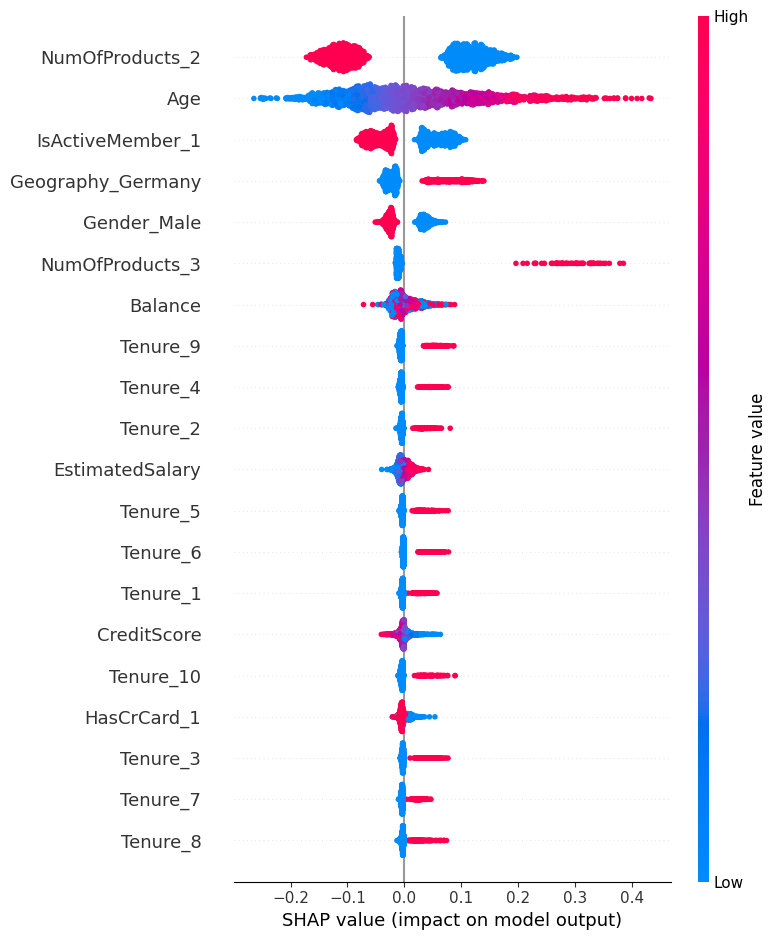

In [126]:
# Plot the summary plot
shap.summary_plot(shap_values, X_test)

## Actionable Insights and Business Recommendations

* Considering the feature importances from the final model, we see that Age and NumOfProducts play an important role in the prediction
* The bank can employ methods to sell multiple products to the same customer. This will reduce attrition. Ideally 3 products of the bank.
* Age seems to be a prominent factor. The bank needs to pay special attention to people between 45 to 60, since this is where the attrition is maximum.
* Customers from Germany seem to be a little more probable to attrite. The bank can double-check its services in this geography to reduce attrition.
* The bank can initially deploy this model, but then also work on collecting more data for future insights. This data doesn't give strong correlation to the target that we are trying to predict.


<font size=6 color='blue'>Power Ahead</font>
___